## Import Library

In [1]:
from bs4 import BeautifulSoup
import requests
import sqlite3

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from openai import OpenAI
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from dotenv import dotenv_values

import firebase_admin
from firebase_admin import credentials
from firebase_admin import storage

from pymysql import connect

## 1. Extract

#### 1.1 project_data.csv

In [2]:
projects_data_csv_df = pd.read_csv("data-source/projects_data.csv")
projects_data_csv_df

C:\Users\MATRIX COMPUTER\AppData\Local\Temp\ipykernel_16020\2141697812.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  projects_data_csv_df = pd.read_csv("data-source/projects_data.csv")


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.2 population_data.csv

In [3]:
# menggunakan skiprows karena terdapat data yang tidak sesuai format (error) di dalam csv
population_data_csv_df = pd.read_csv("data-source/population_data.csv", skiprows=[0, 2])
population_data_csv_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,NaN


#### 1.3 population_data.json

In [4]:
population_data_json_df = pd.read_json("data-source/population_data.json")
population_data_json_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


#### 1.4 population_data.xml

In [5]:
# menggunakan utf-8 agar tanda petik satu (') dapat terbaca sebagai sebuah karakter
with open("data-source/population_data.xml", "r", encoding='utf-8') as f:
    contents = f.read()

# parsing xml menggunakan lmxl
soup = BeautifulSoup(contents, 'lxml')

data = {'Country Name':[], 'Country Code':[], 'Indicator Name':[], 'Indicator Code':[],'year':[], 'value':[]}

# mengekstrak data dari tag record
for record in soup.find_all('record'):
    country_field = record.find('field', attrs={'name': 'Country or Area'})
    country = country_field.text
    country_code = country_field['key']
    indicator_field = record.find('field', attrs={'name': 'Item'})
    indicator = indicator_field.text
    indicator_code = indicator_field['key']
    year = int(record.find('field', attrs={'name': 'Year'}).text)
    value = record.find('field', attrs={'name': 'Value'}).text
    data['Country Name'].append(country)
    data['Country Code'].append(country_code)
    data['Indicator Name'].append(indicator)
    data['Indicator Code'].append(indicator_code)
    data['year'].append(year)
    data['value'].append(value)

population_data_xml_df = pd.DataFrame(data)
population_data_xml_df


,Country Name,Country Code,Indicator Name,Indicator Code,year,value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211
1,Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55438
2,Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56225
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1963,56695
4,Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57032
...,...,...,...,...,...,...
15307,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2013,15054506
15308,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2014,15411675
15309,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2015,15777451
15310,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2016,16150362


#### 1.5 population_data.db

##### 1.5.1 "SELECT * FROM population_data"

In [6]:
conn = sqlite3.connect('data-source/population_data.db')
cursor = conn.cursor()

query1 = "SELECT * FROM population_data"
population_data_db_df1 = pd.read_sql_query(query1, conn)
population_data_db_df1

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


##### 1.5.2 "SELECT Country_Name, Country_Code, 1960 FROM population_data"

In [7]:
query2 = "SELECT Country_Name, Country_Code, 1960 FROM population_data"
population_data_db_df2 = pd.read_sql_query(query2, conn)
population_data_db_df2

,Country_Name,Country_Code,1960
0,Aruba,ABW,1960
1,Afghanistan,AFG,1960
2,Angola,AGO,1960
3,Albania,ALB,1960
4,Andorra,AND,1960
...,...,...,...
259,Kosovo,XKX,1960
260,"Yemen, Rep.",YEM,1960
261,South Africa,ZAF,1960
262,Zambia,ZMB,1960


#### 1.6 data API World Bank

In [8]:
# membuat dataframe berisi kode-kode negara yang akan digunakan
country_code = [
        "ABW", "AFG", "AGO", "ALB", "AND", "ARB", "ARE", "ARG", "ARM", "ASM", "ATG", "AUS", "AUT", "AZE", "BDI", "BEL", "BEN", "BFA", "BGD", "BGR",
        "BHR", "BHS", "BIH", "BLR", "BLZ", "BMU", "BOL", "BRA", "BRB", "BRN", "BTN", "BWA", "CAF", "CAN", "CEB", "CHE", "CHI", "CHL", "CHN", "CIV",
        "CMR", "COD", "COG", "COL", "COM", "CPV", "CRI", "CSS", "CUB", "CUW", "CYM", "CYP", "CZE", "DEU", "DJI", "DMA", "DNK", "DOM", "DZA", "EAP",
        "EAR", "EAS", "ECA", "ECS", "ECU", "EGY", "EMU", "ERI", "ESP", "EST", "ETH", "EUU", "FCS", "FIN", "FJI", "FRA", "FRO", "FSM", "GAB", "GBR",
        "GEO", "GHA", "GIB", "GIN", "GMB", "GNB", "GNQ", "GRC", "GRD", "GRL", "GTM", "GUM", "GUY", "HIC", "HKG", "HND", "HPC", "HRV", "HTI", "HUN",
        "IBD", "IBT", "IDA", "IDB", "IDN", "IDX", "IMN", "IND", "INX", "IRL", "IRN", "IRQ", "ISL", "ISR", "ITA", "JAM", "JOR", "JPN", "KAZ", "KEN",
        "KGZ", "KHM", "KIR", "KNA", "KOR", "KWT", "LAC", "LAO", "LBN", "LBR", "LBY", "LCA", "LCN", "LDC", "LIC", "LIE", "LKA", "LMC", "LMY", "LSO",
        "LTE", "LTU", "LUX", "LVA", "MAC", "MAF", "MAR", "MCO", "MDA", "MDG", "MDV", "MEA", "MEX", "MHL", "MIC", "MKD", "MLI", "MLT", "MMR", "MNA",
        "MNE", "MNG", "MNP", "MOZ", "MRT", "MUS", "MWI", "MYS", "NAC", "NAM", "NCL", "NER", "NGA", "NIC", "NLD", "NOR", "NPL", "NRU", "NZL", "OED",
        "OMN", "OSS", "PAK", "PAN", "PER", "PHL", "PLW", "PNG", "POL", "PRE", "PRI", "PRK", "PRT", "PRY", "PSE", "PSS", "PST", "PYF", "QAT", "ROU",
        "RUS", "RWA", "SAS", "SAU", "SDN", "SEN", "SGP", "SLB", "SLE", "SLV", "SMR", "SOM", "SRB", "SSA", "SSD", "SSF", "SST", "STP", "SUR", "SVK",
        "SVN", "SWE", "SWZ", "SXM", "SYC", "SYR", "TCA", "TCD", "TEA", "TEC", "TGO", "THA", "TJK", "TKM", "TLA", "TLS", "TMN", "TON", "TSA", "TSS",
        "TTO", "TUN", "TUR", "TUV", "TZA", "UGA", "UKR", "UMC", "URY", "USA", "UZB", "VCT", "VEN", "VGB", "VIR", "VNM", "VUT", "WLD", "WSM", "XKX",
        "YEM", "ZAF", "ZMB", "ZWE"
   ]

base_url = "https://api.worldbank.org/v2/countries/{}/indicators/SP.POP.TOTL/?format=json&per_page=1000"

# membuat list country code
country_codes = country_code
# membuat dataframe yang akan menyimpan data dari url api
api_world_bank_df = pd.DataFrame()

# mengakses data dari API untuk setiap country code
for code in country_codes:
   url = base_url.format(code)
   response = requests.get(url)
   data = response.json()[1]  # Mengambil bagian data dari response JSON
   country_data_df = pd.DataFrame(data)
   api_world_bank_df = pd.concat([api_world_bank_df, country_data_df], ignore_index=True)

# memilih kolom yang diperlukan
api_world_bank_df = api_world_bank_df.rename(columns={"country": "Country Name", 
                                                      "countryiso3code": "Country Code", 
                                                      "indicator": "Indicator Name", 
                                                      "date": "Year", 
                                                      "value": "api_value"})
api_world_bank_df["Country Name"] = api_world_bank_df["Country Name"].apply(lambda x: x["value"])
api_world_bank_df["Indicator Code"] = api_world_bank_df["Indicator Name"].apply(lambda x: x["id"])
api_world_bank_df["Indicator Name"] = api_world_bank_df["Indicator Name"].apply(lambda x: x["value"])

# mengubah urutan kolom 
api_world_bank_df = api_world_bank_df.reindex(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code", "Year", "api_value"])
api_world_bank_df

C:\Users\MATRIX COMPUTER\AppData\Local\Temp\ipykernel_16020\2872496536.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  api_world_bank_df = pd.concat([api_world_bank_df, country_data_df], ignore_index=True)


,Country Name,Country Code,Indicator Name,Indicator Code,Year,api_value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,2023,NaN
1,Aruba,ABW,"Population, total",SP.POP.TOTL,2022,106445.0
2,Aruba,ABW,"Population, total",SP.POP.TOTL,2021,106537.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,2020,106585.0
4,Aruba,ABW,"Population, total",SP.POP.TOTL,2019,106442.0
...,...,...,...,...,...,...
16891,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1964,4310332.0
16892,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1963,4177931.0
16893,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1962,4049778.0
16894,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,1961,3925952.0


#### 1.7 rural_population_percent.csv

In [9]:
rural_population_csv_df = pd.read_csv("data-source/rural_population_percent.csv", skiprows=[0, 2])
rural_population_csv_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224000,49.23900,49.25400,49.27000,49.285000,49.30000,...,56.579000,56.94100,57.302000,57.636000,57.942000,58.22100,58.47200,58.696000,58.893000,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779000,91.49200,91.19500,90.89000,90.574000,90.25000,...,75.687000,75.31100,74.926000,74.532000,74.129000,73.71800,73.29700,72.868000,72.430000,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565000,89.20200,88.79600,88.37600,87.942000,87.49600,...,60.701000,59.90300,59.100000,58.301000,57.510000,56.72600,55.95000,55.181000,54.422000,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295000,69.05700,68.98500,68.91400,68.842000,68.77000,...,48.924000,47.83700,46.753000,45.670000,44.617000,43.59100,42.59300,41.624000,40.684000,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550000,39.01700,36.53800,34.12800,31.795000,29.55500,...,11.648000,12.18300,12.740000,13.292000,13.835000,14.36700,14.88500,15.388000,15.873000,NaN
5,Arab World,ARB,Rural population (% of total population),SP.RUR.TOTL.ZS,68.708026,67.96558,67.21982,66.45096,65.652964,64.81343,...,44.156769,43.80453,43.463488,43.128649,42.803731,42.49126,42.19179,41.906071,41.631967,NaN
6,United Arab Emirates,ARE,Rural population (% of total population),SP.RUR.TOTL.ZS,26.500000,25.61700,24.75200,23.90700,23.081000,22.27700,...,16.277000,15.94500,15.625000,15.316000,15.019000,14.73400,14.45900,14.196000,13.942000,NaN
7,Argentina,ARG,Rural population (% of total population),SP.RUR.TOTL.ZS,26.389000,25.78300,25.23300,24.69100,24.156000,23.63100,...,9.205000,9.03400,8.867000,8.705000,8.548000,8.39600,8.24900,8.107000,7.970000,NaN
8,Armenia,ARM,Rural population (% of total population),SP.RUR.TOTL.ZS,48.725000,47.85300,46.98100,46.11100,45.242000,44.37800,...,36.211000,36.42000,36.629000,36.839000,37.025000,37.18800,37.32700,37.442000,37.533000,NaN
9,American Samoa,ASM,Rural population (% of total population),SP.RUR.TOTL.ZS,33.789000,33.35900,32.93200,32.50700,32.084000,31.66600,...,12.303000,12.40600,12.500000,12.587000,12.666000,12.73600,12.79800,12.852000,12.897000,NaN


#### 1.8 electricity_access_percent.csv

In [10]:
electricity_access_csv_df = pd.read_csv("data-source/electricity_access_percent.csv", skiprows=[0, 2])
electricity_access_csv_df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
5,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
6,United Arab Emirates,ARE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
7,Argentina,ARG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.363365,98.820000,99.216164,99.584412,99.837128,99.959244,99.995209,100.000000,NaN,NaN
8,Armenia,ARM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,99.519814,99.800000,99.767151,99.878876,99.954056,99.988976,100.000000,100.000000,NaN,NaN
9,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.9 gdp_data.csv

In [11]:
gdp_csv_df = pd.read_csv("data-source/gdp_data.csv", skiprows=[0, 2])
gdp_csv_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN


## 2. Transform

##### Function data_type di bawah ini digunakan untuk mengubah tipe data dalam dataframe projects_data.csv dan population_data (csv, json, xml, dan db)

In [12]:
def data_type(df, columns, types):
   if types == "string":
      for column_name in columns:
         df[column_name] = df[column_name].astype('string')  
   elif types == "numeric":
      for column_name in columns:
         # errors='coerce' untuk mengubah nilai non numerik menjadi NaN
         df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
   elif types == "date_time":
      for column_name in columns:
         df[column_name] = pd.to_datetime(df[column_name])

##### Function remove_duplicate_column di bawah ini digunakan untuk mengecek kesamaan antara dua buah kolom dan menghapus salah satunya jika value yang dimiliki sama persis

In [13]:
def remove_duplicate_column(df, col1, col2):
   different_status = df[df[col1] != df[col2]]
   if different_status.empty:
      df.drop([col1], axis=1, inplace=True)

##### Function fillna_custom di bawah ini digunakan untuk mengisi nilai yang hilang berdasarkan modus dari nilai kolom acuan yang sejenis

In [14]:
# fungsi untuk mengisi nilai yang hilang berdasarkan aturan bisnis (mengacu pada nilai yang sama/sejenis) untuk dataset projects_data
def fillna_custom(group):
    if group.mode().empty:
        return group  # jika tidak ada modus, maka akan me-return grup tanpa perubahan
    else:
        mode_value = group.mode().iloc[0]  # mengambil nilai modus dari grup
        return group.fillna(mode_value)  # mengisi nilai yang hilang dengan nilai modus

##### Function fill_missing di bawah ini digunakan untuk mengisi nilai yang hilang berdasarkan rata-rata data numerik dari baris tersebut

In [15]:
def fill_missing(row):
    numeric_values = row[row.apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()] 
    row_mean = numeric_values.mean() if not numeric_values.empty else np.nan
    return row.fillna(row_mean)

##### Function cleaning di bawah ini digunakan untuk menghapus data duplikat dan menghapus missing value yang berlebihan

In [16]:
def cleaning(df):
   # mengganti nilai '!$!0' (khususnya pada dataset projects_data.csv di kolom sector1 dan theme1) pada df dengan NaN agar dianggap sebagai missing values
   df.replace('!$!0', np.nan, inplace=True)
   
   df.drop_duplicates(inplace=True)
   
   missing_values = df.isnull().sum()
   num_of_rows = int(len(df)/4)
   for column, missing_count in missing_values.items():
      if missing_count >= num_of_rows:
         # menghapus kolom jika memiliki missing values >= 25%
         df.drop(column, axis=1, inplace=True)
      
   # menghapus baris yang memiliki nilai NaN lebih dari 1, tetapi mempertahankan baris yang memiliki minimal dua nilai non-NaN
   df.dropna(thresh=len(df.columns) - 1, inplace=True)

   df = df.reset_index(drop=True)
   return df

#### 2.1 Melakukan encoding dataset mystery.csv dengan utf-16

In [17]:
mystery_csv_df = pd.read_csv("data-source/mystery.csv", encoding='utf-16')
mystery_csv_df.drop("Unnamed: 0", axis=1, inplace=True)

mystery_csv_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


#### 2.2 Melakukan cleaning data, handling missing value, dan mengkombinasikan data dari rural_population_percent.csv dan electricity_access_percent.csv yang merupakan data populasi pedesaan dan akses listrik dari berbagai negara

In [18]:
cleaned_rural_df = cleaning(rural_population_csv_df)
rural_melted_df = pd.melt(cleaned_rural_df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value').sort_values(by='Country Name').reset_index()
rural_melted_df.drop("index", axis=1, inplace=True)

cleaned_electricity_df = cleaning(electricity_access_csv_df)
electricity_melted_df = pd.melt(cleaned_electricity_df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value').sort_values(by='Country Name').reset_index()
electricity_melted_df.drop("index", axis=1, inplace=True)

rural_elec = pd.merge(rural_melted_df, electricity_melted_df, on=["Country Name", "Country Code", "Year"], how='inner', suffixes=("_rural", "_electricity"))

data_type(rural_elec, ["Country Name", "Country Code", "Indicator Name_rural", "Indicator Code_rural", "Indicator Name_electricity", "Indicator Code_electricity"], "string")
data_type(rural_elec, ["Year", "Value_rural", "Value_electricity"], "numeric")

rural_elec_df = rural_elec.apply(fill_missing, axis=1)
rural_elec_df.to_csv("data-cleaned/cleaned_rural_electricity.csv")
rural_elec

,Country Name,Country Code,Indicator Name_rural,Indicator Code_rural,Year,Value_rural,Indicator Name_electricity,Indicator Code_electricity,Value_electricity
0,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,2001,78.404,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.776537
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1993,80.830,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.010000
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,2012,74.532,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.100000
3,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1994,80.538,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.010000
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1998,79.339,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.021977
...,...,...,...,...,...,...,...,...,...
6637,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,1994,68.665,Access to electricity (% of population),EG.ELC.ACCS.ZS,28.100000
6638,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,1993,69.060,Access to electricity (% of population),EG.ELC.ACCS.ZS,31.436678
6639,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,1992,69.501,Access to electricity (% of population),EG.ELC.ACCS.ZS,28.200000
6640,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,1991,70.262,Access to electricity (% of population),EG.ELC.ACCS.ZS,30.718805


#### 2.3 Cleaning data, handling missing values, dan menyesuaikan tipe data pada population_data.csv, population_data.json, population_data.xml, population_data.db, dan data API World Bank

##### 2.3.1 projects_data.csv (sekaligus dengan cleaning data)

In [19]:
# memperbaiki value dari kolom numerik agar saat diubah ke numerik tanda komanya tidak teraca
projects_data_csv_df['lendprojectcost'] = projects_data_csv_df['lendprojectcost'].str.replace(',', '')
projects_data_csv_df['ibrdcommamt'] = projects_data_csv_df['ibrdcommamt'].str.replace(',', '')
projects_data_csv_df['idacommamt'] = projects_data_csv_df['idacommamt'].str.replace(',', '')
projects_data_csv_df['totalamt'] = projects_data_csv_df['totalamt'].str.replace(',', '')
projects_data_csv_df['grantamt'] = projects_data_csv_df['grantamt'].str.replace(',', '')

In [20]:
data_type(projects_data_csv_df, ["id", "regionname", "countryname", "prodline", "lendinginstr", "lendinginstrtype", "supplementprojectflg",
                                 "productlinetype", "projectstatusdisplay", "status", "project_name", "board_approval_month", "url", "sector1",
                                 "sector", "mjsector"], "string")
data_type(projects_data_csv_df, ["lendprojectcost", "ibrdcommamt", "idacommamt", "totalamt", "grantamt"], "numeric")
data_type(projects_data_csv_df, ["boardapprovaldate", "closingdate"], "date_time")

cleaned_prodatcsv_df = cleaning(projects_data_csv_df)

missing_values = cleaned_prodatcsv_df.isnull().sum()
print("Missing Values:")
print(missing_values)
print(len(cleaned_prodatcsv_df))

Missing Values:
id                         0
regionname                 0
countryname                0
prodline                   0
lendinginstr               0
lendinginstrtype           0
supplementprojectflg      45
productlinetype            0
projectstatusdisplay       0
status                     0
project_name               0
boardapprovaldate          0
board_approval_month       0
closingdate             1712
lendprojectcost           93
ibrdcommamt                0
idacommamt                 0
totalamt                   0
grantamt                   0
url                        0
sector1                    0
sector                     0
mjsector                   0
dtype: int64
16427


In [21]:
# handling missing values pada projects_data.csv

# mengambil data dari kolom lendinginstr yang paling banyak muncul
modus_val = cleaned_prodatcsv_df["lendinginstr"].value_counts().nlargest(1)
# mengisi missing values pada kolom lendinginstr menjadi lendinginstr yang paling banyak muncul
cleaned_prodatcsv_df["lendinginstr"].fillna(str(modus_val.index[0]), inplace=True)

# kolom lendinginstrtype, supplementprojectflg, projectstatusdisplay, boardapprovaldate, board_approval_month, dan sector1 berdasarkan kolom lendinginstr
cleaned_prodatcsv_df["lendinginstrtype"] = cleaned_prodatcsv_df.groupby("lendinginstr")["lendinginstrtype"].transform(fillna_custom)
cleaned_prodatcsv_df["supplementprojectflg"] = cleaned_prodatcsv_df.groupby("lendinginstr")["supplementprojectflg"].transform(fillna_custom)
cleaned_prodatcsv_df["projectstatusdisplay"] = cleaned_prodatcsv_df.groupby("lendinginstr")["projectstatusdisplay"].transform(fillna_custom)
cleaned_prodatcsv_df["boardapprovaldate"] = cleaned_prodatcsv_df.groupby("lendinginstr")["boardapprovaldate"].transform(fillna_custom)
cleaned_prodatcsv_df["board_approval_month"] = cleaned_prodatcsv_df.groupby("lendinginstr")["board_approval_month"].transform(fillna_custom)
cleaned_prodatcsv_df["sector1"] = cleaned_prodatcsv_df.groupby("lendinginstr")["sector1"].transform(fillna_custom)

# kolom status berdasarkan kolom projectstatusdisplay
cleaned_prodatcsv_df["status"] = cleaned_prodatcsv_df.groupby("projectstatusdisplay")["status"].transform(fillna_custom)

# kolom sector dan mjsector berdasarkan kolom sector1
cleaned_prodatcsv_df["sector"] = cleaned_prodatcsv_df.groupby("sector1")["sector"].transform(fillna_custom)
cleaned_prodatcsv_df["mjsector"] = cleaned_prodatcsv_df.groupby("sector1")["mjsector"].transform(fillna_custom)

# kolom lendprojectcost dengan menjumlahkan value kolom ibrdcommamt, idacommamt, totalamt, dan grantamt
cleaned_prodatcsv_df['lendprojectcost'] = cleaned_prodatcsv_df['lendprojectcost'].fillna(cleaned_prodatcsv_df['ibrdcommamt'] + cleaned_prodatcsv_df['idacommamt'] + cleaned_prodatcsv_df['totalamt'] + cleaned_prodatcsv_df['grantamt'])

# mengganti nilai yang hilang pada kolom closingdate berdasarkan kolom boardapprovaldate
cleaned_prodatcsv_df["closingdate"] = cleaned_prodatcsv_df.groupby("boardapprovaldate")["closingdate"].transform(fillna_custom)
# mengambil data dari kolom closingdate yang paling banyak muncul
modus_val = cleaned_prodatcsv_df["closingdate"].value_counts().nlargest(1)
# mengisi missing values pada kolom closingdate menjadi closingdate yang paling banyak muncul
cleaned_prodatcsv_df["closingdate"].fillna(str(modus_val.index[0]), inplace=True)

missing_values = cleaned_prodatcsv_df.isnull().sum()
print("Missing Values:")
print(missing_values)
print(len(cleaned_prodatcsv_df))

Missing Values:
id                      0
regionname              0
countryname             0
prodline                0
lendinginstr            0
lendinginstrtype        0
supplementprojectflg    0
productlinetype         0
projectstatusdisplay    0
status                  0
project_name            0
boardapprovaldate       0
board_approval_month    0
closingdate             0
lendprojectcost         0
ibrdcommamt             0
idacommamt              0
totalamt                0
grantamt                0
url                     0
sector1                 0
sector                  0
mjsector                0
dtype: int64
16427


In [22]:
# memperbaiki value dari kolom
cleaned_prodatcsv_df['countryname'] = cleaned_prodatcsv_df['countryname'].apply(lambda x: x.split(';')[0]).astype('string')
cleaned_prodatcsv_df['sector1'] = cleaned_prodatcsv_df['sector1'].apply(lambda x: x.split('!')[0])
cleaned_prodatcsv_df['sector1'] = cleaned_prodatcsv_df['sector1'].apply(lambda x: x.split(';')[0]).astype('string')
cleaned_prodatcsv_df['sector'] = cleaned_prodatcsv_df['sector'].apply(lambda x: x.split(';')[0]).astype('string')
cleaned_prodatcsv_df['mjsector'] = cleaned_prodatcsv_df['mjsector'].apply(lambda x: x.split(';')[0]).astype('string')

# menghapus kolom-kolom yang memungkinkan untuk memiliki value yang sama      
remove_duplicate_column(cleaned_prodatcsv_df, "projectstatusdisplay", "status")
remove_duplicate_column(cleaned_prodatcsv_df, "sector1", "sector")

cleaned_prodatcsv_df.to_csv("data-cleaned/cleaned_projects_data.csv")
cleaned_prodatcsv_df.dtypes

id                           string[python]
regionname                   string[python]
countryname                  string[python]
prodline                     string[python]
lendinginstr                 string[python]
lendinginstrtype             string[python]
supplementprojectflg         string[python]
productlinetype              string[python]
status                       string[python]
project_name                 string[python]
boardapprovaldate       datetime64[ns, UTC]
board_approval_month         string[python]
closingdate             datetime64[ns, UTC]
lendprojectcost                     float64
ibrdcommamt                           int64
idacommamt                            int64
totalamt                              int64
grantamt                              int64
url                          string[python]
sector                       string[python]
mjsector                     string[python]
dtype: object

##### 2.3.2 mystery.csv

In [23]:
cleaned_mystery_df = cleaning(mystery_csv_df)

cleaned_mystery_df = cleaned_mystery_df.sort_values(by="Country Name").reset_index()
cleaned_mystery_df.drop("index", axis=1, inplace=True)
cleaned_mystery_df = cleaned_mystery_df.apply(fill_missing, axis=1)

data_type(cleaned_mystery_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

cleaned_mystery_df.to_csv("data-cleaned/cleaned_mystery.csv")
cleaned_mystery_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,3.250000e+04,3.430000e+04,3.500000e+04,3.980000e+04,4.080000e+04,4.350000e+04,...,1.083990e+05,1.084050e+05,1.083580e+05,1.082920e+05,1.081910e+05,1.080440e+05,1.078840e+05,1.077100e+05,1.075100e+05,1.072680e+05
254,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
255,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
256,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.3.3 population_data.csv

In [24]:
cleaned_popcsv_df = cleaning(population_data_csv_df)

cleaned_popdatcsv_df = cleaned_popcsv_df.sort_values(by="Country Name").reset_index()
cleaned_popdatcsv_df.drop("index", axis=1, inplace=True)

cleaned_popdatcsv_df = cleaned_popdatcsv_df.apply(fill_missing, axis=1)

data_type(cleaned_popdatcsv_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

cleaned_popdatcsv_df.to_csv("data-cleaned/cleaned_popcsv.csv")
cleaned_popdatcsv_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,3.250000e+04,3.430000e+04,3.500000e+04,3.980000e+04,4.080000e+04,4.350000e+04,...,1.083990e+05,1.084050e+05,1.083580e+05,1.082920e+05,1.081910e+05,1.080440e+05,1.078840e+05,1.077100e+05,1.075100e+05,1.072680e+05
254,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
255,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
256,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.3.4 population_data.json

In [25]:
cleaned_popjson_df = cleaning(population_data_json_df)

cleaned_popdatjson_df = cleaned_popjson_df.sort_values(by="Country Name").reset_index()
cleaned_popdatjson_df.drop("index", axis=1, inplace=True)

cleaned_popdatjson_df = cleaned_popdatjson_df.apply(fill_missing, axis=1)

data_type(cleaned_popdatjson_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

cleaned_popdatjson_df.to_csv("data-cleaned/cleaned_popjson.csv")
cleaned_popdatjson_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,3.250000e+04,3.430000e+04,3.500000e+04,3.980000e+04,4.080000e+04,4.350000e+04,...,1.083990e+05,1.084050e+05,1.083580e+05,1.082920e+05,1.081910e+05,1.080440e+05,1.078840e+05,1.077100e+05,1.075100e+05,1.072680e+05
254,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
255,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
256,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.3.5 population_data.xml

In [26]:
data_type(population_data_xml_df, ["year", "value"], "numeric")

population_data_xml_df = population_data_xml_df.pivot(values='value', index=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], columns='year').reset_index()   # mengubah format dataframe
population_data_xml_df = population_data_xml_df.rename_axis(None, axis=1)

cleaned_popxml_df = cleaning(population_data_xml_df)

cleaned_popxml_df = cleaned_popxml_df.apply(fill_missing, axis=1)

data_type(cleaned_popxml_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

cleaned_popxml_df.to_csv("data-cleaned/cleaned_popxml.csv")
cleaned_popxml_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,3.250000e+04,3.430000e+04,3.500000e+04,3.980000e+04,4.080000e+04,4.350000e+04,...,1.083990e+05,1.084050e+05,1.083580e+05,1.082920e+05,1.081910e+05,1.080440e+05,1.078840e+05,1.077100e+05,1.075100e+05,1.072680e+05
254,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
255,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
256,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.3.6 population_data.db

In [27]:
population_data_db_df1 = population_data_db_df1.rename(columns={"Country_Name": "Country Name",
                                                                "Country_Code": "Country Code",
                                                                "Indicator_Name": "Indicator Name",
                                                                "Indicator_Code": "Indicator Code"
                                                               })

cleaned_popdb_df = cleaning(population_data_db_df1)
cleaned_popdb_df.drop("index", axis=1, inplace=True)

cleaned_popdatdb_df = cleaned_popdb_df.sort_values(by="Country Name").reset_index()
cleaned_popdatdb_df.drop("index", axis=1, inplace=True)

cleaned_popdatdb_df = cleaned_popdatdb_df.apply(fill_missing, axis=1)

data_type(cleaned_popdatdb_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

cleaned_popdatdb_df.to_csv("data-cleaned/cleaned_popdb.csv")
cleaned_popdatdb_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,3.250000e+04,3.430000e+04,3.500000e+04,3.980000e+04,4.080000e+04,4.350000e+04,...,1.083990e+05,1.084050e+05,1.083580e+05,1.082920e+05,1.081910e+05,1.080440e+05,1.078840e+05,1.077100e+05,1.075100e+05,1.072680e+05
254,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
255,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
256,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.3.7 API World Bank

In [28]:
data_type(api_world_bank_df, ["Year"], "numeric")

api_world_bank_df = api_world_bank_df.pivot(index=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], columns='Year', values='api_value').reset_index()
api_world_bank_df.columns.name = None   # menghapus nama kolom indeks
# cleaned_apiwb_df = cleaning(api_world_bank_df)

api_world_bank_df = api_world_bank_df.apply(fill_missing, axis=1)

data_type(api_world_bank_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

api_world_bank_df.to_csv("data-cleaned/cleaned_popapi.csv")
api_world_bank_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.622466e+06,8.790140e+06,8.969047e+06,9.157465e+06,9.355514e+06,9.565147e+06,...,3.271621e+07,3.375350e+07,3.463621e+07,3.564342e+07,3.668678e+07,3.776950e+07,3.897223e+07,4.009946e+07,4.112877e+07,1.841010e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,2.866376e+06,2.854191e+06,2.837849e+06,2.811666e+06,2.777689e+06,2.713096e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.139431e+07,1.159861e+07,1.177826e+07,1.196945e+07,1.217910e+07,1.238126e+07,...,3.876017e+07,3.954315e+07,4.033933e+07,4.113655e+07,4.192701e+07,4.270537e+07,4.345167e+07,4.417797e+07,4.490322e+07,2.591513e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.008500e+04,2.062600e+04,2.127200e+04,2.194900e+04,2.265600e+04,2.339100e+04,...,5.221700e+04,5.136800e+04,5.044800e+04,4.946300e+04,4.842400e+04,4.732100e+04,4.618900e+04,4.503500e+04,4.427300e+04,4.234419e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,9.443000e+03,1.021600e+04,1.101400e+04,1.183900e+04,1.269000e+04,1.356300e+04,...,7.162100e+04,7.174600e+04,7.254000e+04,7.383700e+04,7.501300e+04,7.634300e+04,7.770000e+04,7.903400e+04,7.982400e+04,5.001068e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,3.458736e+06,3.458736e+06,3.458736e+06,3.458736e+06,3.458736e+06,3.458736e+06,...,4.173398e+06,4.270092e+06,4.367088e+06,4.454805e+06,4.569087e+06,4.685306e+06,4.803269e+06,4.922749e+06,5.043612e+06,3.458736e+06
260,World,WLD,"Population, total",SP.POP.TOTL,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,...,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09,5.407576e+09
261,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.542459e+06,5.646668e+06,5.753386e+06,5.860197e+06,5.973803e+06,6.097298e+06,...,2.775330e+07,2.851654e+07,2.927400e+07,3.003439e+07,3.079051e+07,3.154669e+07,3.228405e+07,3.298164e+07,3.369661e+07,1.583325e+07
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.119430e+06,3.219451e+06,3.323427e+06,3.431381e+06,3.542764e+06,3.658024e+06,...,1.573779e+07,1.624823e+07,1.676776e+07,1.729805e+07,1.783589e+07,1.838048e+07,1.892772e+07,1.947312e+07,2.001768e+07,9.055473e+06


#### 2.4 Melakukan penggabungan data populasi (mystery, csv, json, xml, dan db) agar memudahkan proses Scaling Features

##### 2.4.1 Menggabungkan dataset population_data

In [29]:
# menyamakan header (nama kolom) seluruh dataset yang akan digabungkan agar tidak terdapat kesalahpahaman
cleaned_mystery_df.columns = cleaned_popdatcsv_df.columns
cleaned_popdatjson_df.columns = cleaned_popdatcsv_df.columns
cleaned_popdatdb_df.columns = cleaned_popdatcsv_df.columns
cleaned_popxml_df.columns = cleaned_popdatcsv_df.columns

population_data = pd.concat([cleaned_mystery_df, cleaned_popdatcsv_df, cleaned_popdatjson_df, cleaned_popdatdb_df, cleaned_popxml_df], axis=0).reset_index(drop=True)
population_data.drop_duplicates(subset=['Country Code'], inplace=True)
population_data.sort_values(by=['Country Name'], inplace=True)
population_data.reset_index(drop=True, inplace=True)

population_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,3.250000e+04,3.430000e+04,3.500000e+04,3.980000e+04,4.080000e+04,4.350000e+04,...,1.083990e+05,1.084050e+05,1.083580e+05,1.082920e+05,1.081910e+05,1.080440e+05,1.078840e+05,1.077100e+05,1.075100e+05,1.072680e+05
254,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
255,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
256,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.4.2 Melakukan cleaning data kemudian mengisi missing values setelah dataframe digabungkan

In [30]:
population_data = cleaning(population_data)
population_data = population_data.apply(fill_missing, axis=1)
population_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07
1,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06
2,Algeria,DZA,"Population, total",SP.POP.TOTL,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,...,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07,4.131814e+07
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,5.564100e+04
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,7.696500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,3.250000e+04,3.430000e+04,3.500000e+04,3.980000e+04,4.080000e+04,4.350000e+04,...,1.083990e+05,1.084050e+05,1.083580e+05,1.082920e+05,1.081910e+05,1.080440e+05,1.078840e+05,1.077100e+05,1.075100e+05,1.072680e+05
254,World,WLD,"Population, total",SP.POP.TOTL,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09
255,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5.172135e+06,5.260501e+06,5.351799e+06,5.446063e+06,5.543339e+06,5.643643e+06,...,2.235639e+07,2.297493e+07,2.360678e+07,2.425221e+07,2.490997e+07,2.557632e+07,2.624633e+07,2.691621e+07,2.758421e+07,2.825042e+07
256,Zambia,ZMB,"Population, total",SP.POP.TOTL,3.044846e+06,3.140264e+06,3.240587e+06,3.345145e+06,3.452942e+06,3.563407e+06,...,1.308252e+07,1.345642e+07,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07,1.709413e+07


##### 2.4.3 Melakukan pengecekan pada population_data dengan data dari API

In [31]:
data_equal = population_data.equals(api_world_bank_df)
if data_equal:
   print("Apakah kedua DataFrame memiliki nilai yang sama:", data_equal)
   population_data = population_data
else:
   print("Apakah kedua DataFrame memiliki nilai yang sama:", data_equal)
   # population_data.columns = api_world_bank_df.columns
   population_data.update(api_world_bank_df)

Apakah kedua DataFrame memiliki nilai yang sama: False


#### 2.5 Mengisi missing value pada dataset gdp_data.csv (sekaligus dengan cleaning data dan menyesuaikan tipe data)

In [32]:
gdp_csv_df = gdp_csv_df.apply(fill_missing, axis=1)
gdp_csv_df = cleaning(gdp_csv_df)
gdp_csv_df.drop(['Unnamed: 62'], axis=1, inplace=True)

data_type(gdp_csv_df, ["Country Name", "Country Code", "Indicator Name", "Indicator Code"], "string")

gdp_csv_df.to_csv("data-cleaned/cleaned_gdp_data.csv")
gdp_csv_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09,2.036355e+09
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,3.847557e+10,3.847557e+10,3.847557e+10,3.847557e+10,3.847557e+10,3.847557e+10,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,5.101823e+09,5.101823e+09,5.101823e+09,5.101823e+09,5.101823e+09,5.101823e+09,...,5.687488e+09,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09
252,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,1.701070e+10
253,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11
254,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


#### 2.6 Membuat dummy variable untuk projects_data menggunakan get_dummies()

In [33]:
# membuat dummy variable untuk projects_data.csv dengan mengecek terlebih dahulu unique key dari kolom status (kolom yang paling ideal untuk dibuat dummy-nya)
if 2 <= cleaned_prodatcsv_df["status"].nunique() <= 10:
   df_dummies = pd.get_dummies(cleaned_prodatcsv_df["status"])
   projects_data_dummies = pd.concat([cleaned_prodatcsv_df, df_dummies], axis=1)

projects_data_dummies

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,status,project_name,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector,mjsector,Active,Closed
0,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,N,L,Active,Nigeria For Women Project,...,100000000.0,0,100000000,100000000,0,http://projects.worldbank.org/P161364?lang=en,Social Protection,Social Protection,True,False
1,P158756,Latin America and Caribbean,Republic of Ecuador,PE,Investment Project Financing,IN,Y,L,Active,Additional Financing Quito Metro Line One Project,...,632200000.0,230000000,0,230000000,0,http://projects.worldbank.org/P158756?lang=en,Urban Transport,Transportation,True,False
2,P164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,N,L,Active,Grenada First Fiscal Resilience and Blue Growt...,...,35000000.0,0,30000000,30000000,0,http://projects.worldbank.org/P164289?lang=en,Other Public Administration,Public Administration,True,False
3,P154525,South Asia,Republic of India,PE,Investment Project Financing,IN,N,L,Active,Uttarakhand Workforce Development Project,...,92500000.0,74000000,0,74000000,0,http://projects.worldbank.org/P154525?lang=en,Workforce Development and Vocational Education,Education,True,False
4,P167330,East Asia and Pacific,Kingdom of Tonga,PE,Development Policy Lending,AD,N,L,Active,Tonga Second Inclusive Growth Development Poli...,...,10000000.0,0,10000000,10000000,0,http://projects.worldbank.org/P167330?lang=en,Energy Transmission and Distribution,Energy and Extractives,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16422,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Power and Irrigation Project,...,13500000.0,13500000,0,13500000,0,http://projects.worldbank.org/P006578/power-ir...,(Historic)Hydro,(Historic)Electric Power & Other Energy,False,True
16423,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,N,L,Closed,Steel Mill and Railway Project,...,12000000.0,12000000,0,12000000,0,http://projects.worldbank.org/P037451/steel-mi...,(Historic)Economic management,(Historic)Multisector,False,True
16424,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,N,L,Closed,Post War Reconstruction Project,...,40000000.0,40000000,0,40000000,0,http://projects.worldbank.org/P037362/post-war...,(Historic)Economic management,(Historic)Multisector,False,True
16425,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,N,L,Closed,Post-war Reconstruction Project,...,195000000.0,195000000,0,195000000,0,http://projects.worldbank.org/P037452/post-war...,(Historic)Economic management,(Historic)Multisector,False,True


#### 2.7 Menghapus outlier pada dataset projects_data.csv dan population_data

##### Function remove_outliers di bawah ini digunakan untuk menghapus outlier yang ada pada dataframe

In [34]:
def remove_outliers(df):
    numerical_df = df.select_dtypes(include=['number'])
    if numerical_df.empty:
        print("Tidak ada kolom numerik yang bisa diidentifikasi outliernya.")
        return df

    # Hitung Q1, Q3, dan IQR hanya pada kolom-kolom numerik
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1

    # Definisikan batas outlier menggunakan Series
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame berdasarkan batas outlier pada kolom numerik
    outlier_filter = (numerical_df >= lower_bound) & (numerical_df <= upper_bound)
    cleaned_data = df[outlier_filter.all(axis=1)]

    return cleaned_data

##### 2.7.1 projects_data

In [35]:
projects_data = remove_outliers(cleaned_prodatcsv_df).reset_index()
projects_data.drop("index", axis=1, inplace=True)
projects_data.to_csv("data-dest/fixed_projects_data.csv")
projects_data

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,status,project_name,...,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector,mjsector
0,P164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,N,L,Active,Grenada First Fiscal Resilience and Blue Growt...,...,June,2019-12-31 00:00:00+00:00,35000000.0,0,30000000,30000000,0,http://projects.worldbank.org/P164289?lang=en,Other Public Administration,Public Administration
1,P154525,South Asia,Republic of India,PE,Investment Project Financing,IN,N,L,Active,Uttarakhand Workforce Development Project,...,June,2023-06-30 00:00:00+00:00,92500000.0,74000000,0,74000000,0,http://projects.worldbank.org/P154525?lang=en,Workforce Development and Vocational Education,Education
2,P167330,East Asia and Pacific,Kingdom of Tonga,PE,Development Policy Lending,AD,N,L,Active,Tonga Second Inclusive Growth Development Poli...,...,June,2018-12-31 00:00:00+00:00,10000000.0,0,10000000,10000000,0,http://projects.worldbank.org/P167330?lang=en,Energy Transmission and Distribution,Energy and Extractives
3,P159692,Middle East and North Africa,Lebanese Republic,PE,Investment Project Financing,IN,N,L,Active,Land Administration System Modernization,...,June,2023-12-31 00:00:00+00:00,43000000.0,43000000,0,43000000,0,http://projects.worldbank.org/P159692?lang=en,Other Public Administration,Public Administration
4,P165558,Middle East and North Africa,Republic of Djibouti,PE,Investment Project Financing,IN,N,L,Active,Djibouti Support for Women and Youth Entrepren...,...,June,2023-12-31 00:00:00+00:00,15000000.0,0,15000000,15000000,0,http://projects.worldbank.org/P165558?lang=en,Other Industry,Industry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867,P037455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,N,L,Closed,Holland America Lijn Project,...,July,1948-08-03 00:00:00+00:00,2000000.0,2000000,0,2000000,0,http://projects.worldbank.org/P037455/holland-...,(Historic)Transportation adjustment,Transportation
8868,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,N,L,Closed,Agricultural Machinery Project,...,March,1950-01-01 00:00:00+00:00,2500000.0,2500000,0,2500000,0,http://projects.worldbank.org/P006577/agricult...,(Historic)Agriculture adjustment,Agriculture
8869,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Power and Irrigation Project,...,March,1954-12-31 00:00:00+00:00,13500000.0,13500000,0,13500000,0,http://projects.worldbank.org/P006578/power-ir...,(Historic)Hydro,(Historic)Electric Power & Other Energy
8870,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,N,L,Closed,Steel Mill and Railway Project,...,August,1949-03-31 00:00:00+00:00,12000000.0,12000000,0,12000000,0,http://projects.worldbank.org/P037451/steel-mi...,(Historic)Economic management,(Historic)Multisector


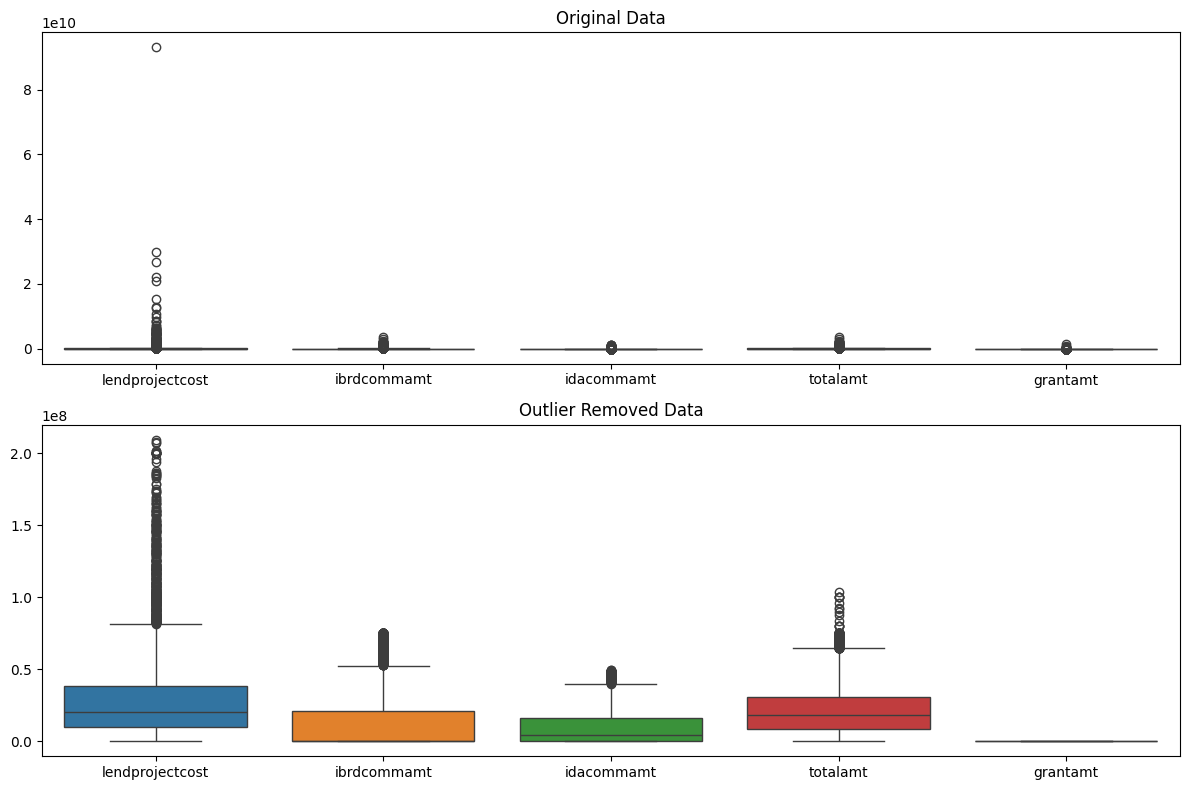

In [36]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1) 
sns.boxplot(data=cleaned_prodatcsv_df)
plt.title('Original Data')

plt.subplot(2, 1, 2)
sns.boxplot(data=projects_data)
plt.title('Outlier Removed Data')

plt.tight_layout()
plt.show()

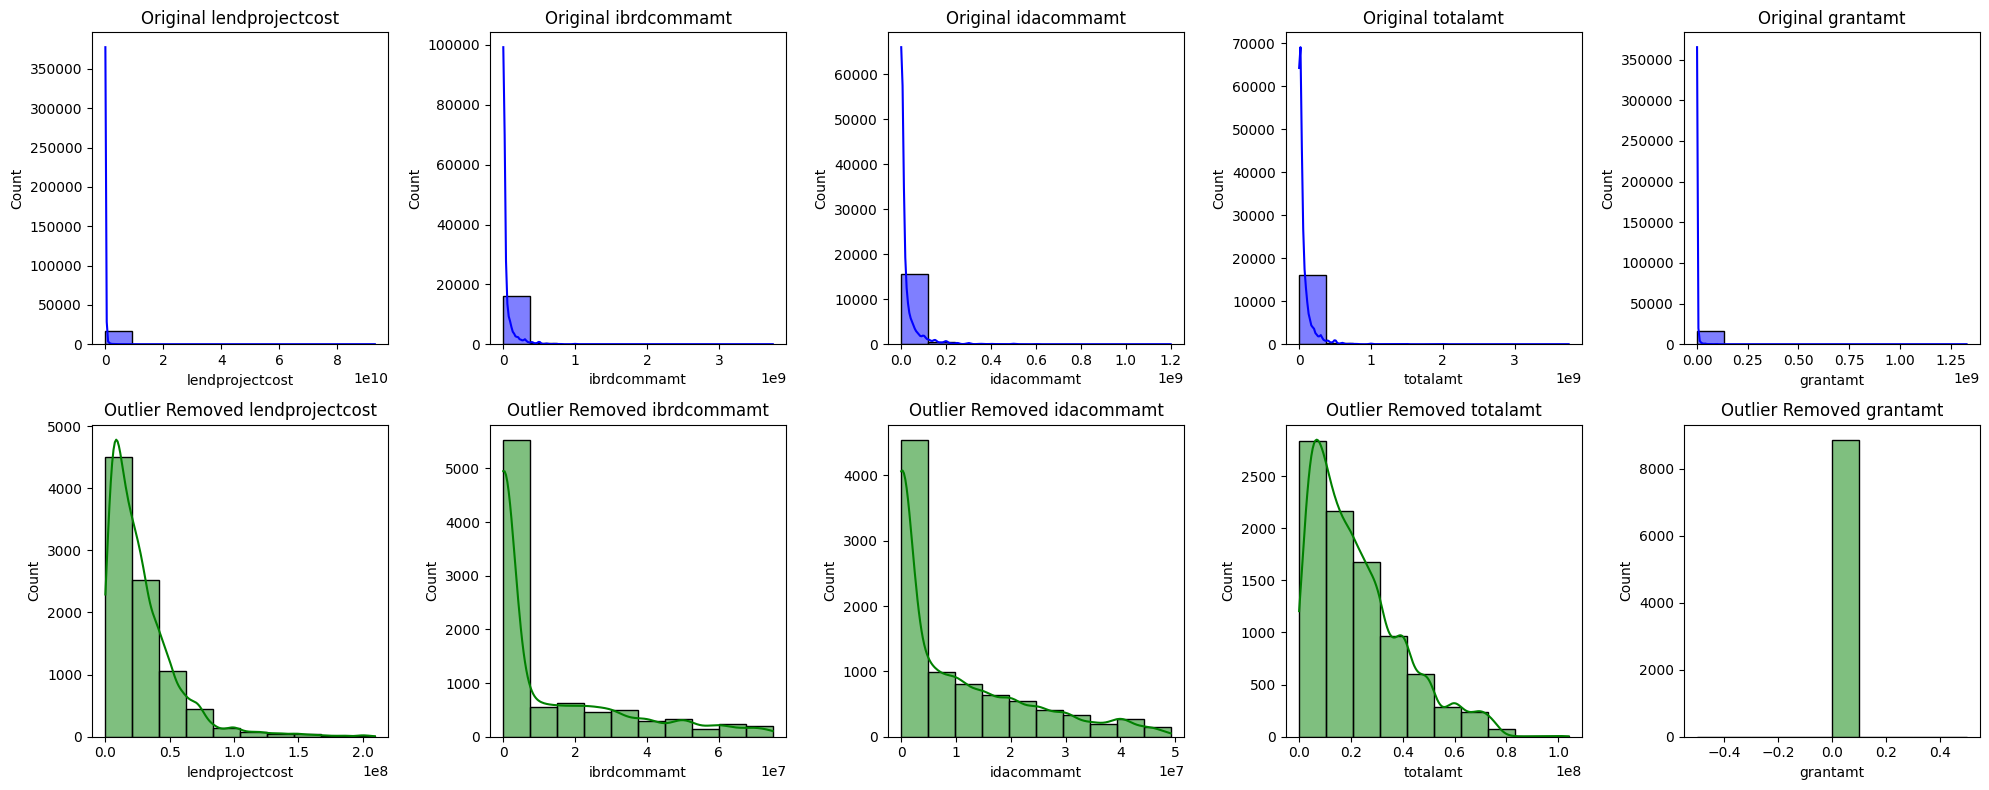

In [37]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# original
sns.histplot(cleaned_prodatcsv_df['lendprojectcost'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Original lendprojectcost')
sns.histplot(cleaned_prodatcsv_df['ibrdcommamt'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 1])
axs[0, 1].set_title('Original ibrdcommamt')
sns.histplot(cleaned_prodatcsv_df['idacommamt'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 2])
axs[0, 2].set_title('Original idacommamt')
sns.histplot(cleaned_prodatcsv_df['totalamt'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 3])
axs[0, 3].set_title('Original totalamt')
sns.histplot(cleaned_prodatcsv_df['grantamt'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 4])
axs[0, 4].set_title('Original grantamt')

# removed
sns.histplot(projects_data['lendprojectcost'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Outlier Removed lendprojectcost')
sns.histplot(projects_data['ibrdcommamt'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 1])
axs[1, 1].set_title('Outlier Removed ibrdcommamt')
sns.histplot(projects_data['idacommamt'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 2])
axs[1, 2].set_title('Outlier Removed idacommamt')
sns.histplot(projects_data['totalamt'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 3])
axs[1, 3].set_title('Outlier Removed totalamt')
sns.histplot(projects_data['grantamt'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 4])
axs[1, 4].set_title('Outlier Removed grantamt')

plt.tight_layout()
plt.show()

##### 2.7.2 population_data

In [38]:
pops_dat = remove_outliers(population_data).reset_index()
pops_dat.drop("index", axis=1, inplace=True)
pops_dat

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
1,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
2,Algeria,DZA,"Population, total",SP.POP.TOTL,11124888.0,11404859.0,11690153.0,11985136.0,12295970.0,12626952.0,...,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,20013.0,20486.0,21117.0,21882.0,22698.0,23520.0,...,57030.0,56227.0,55637.0,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0,55641.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Upper middle income,,"Population, total",SP.POP.TOTL,32670629.0,33666772.0,34684165.0,35722091.0,36780985.0,37860012.0,...,86707801.0,87565407.0,88472512.0,89436644.0,90451881.0,91497725.0,92544915.0,93571567.0,94569072.0,95540800.0
201,Uruguay,URY,"Population, total",SP.POP.TOTL,32500.0,34300.0,35000.0,39800.0,40800.0,43500.0,...,108399.0,108405.0,108358.0,108292.0,108191.0,108044.0,107884.0,107710.0,107510.0,107268.0
202,Vanuatu,VUT,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
203,"Venezuela, RB",VEN,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


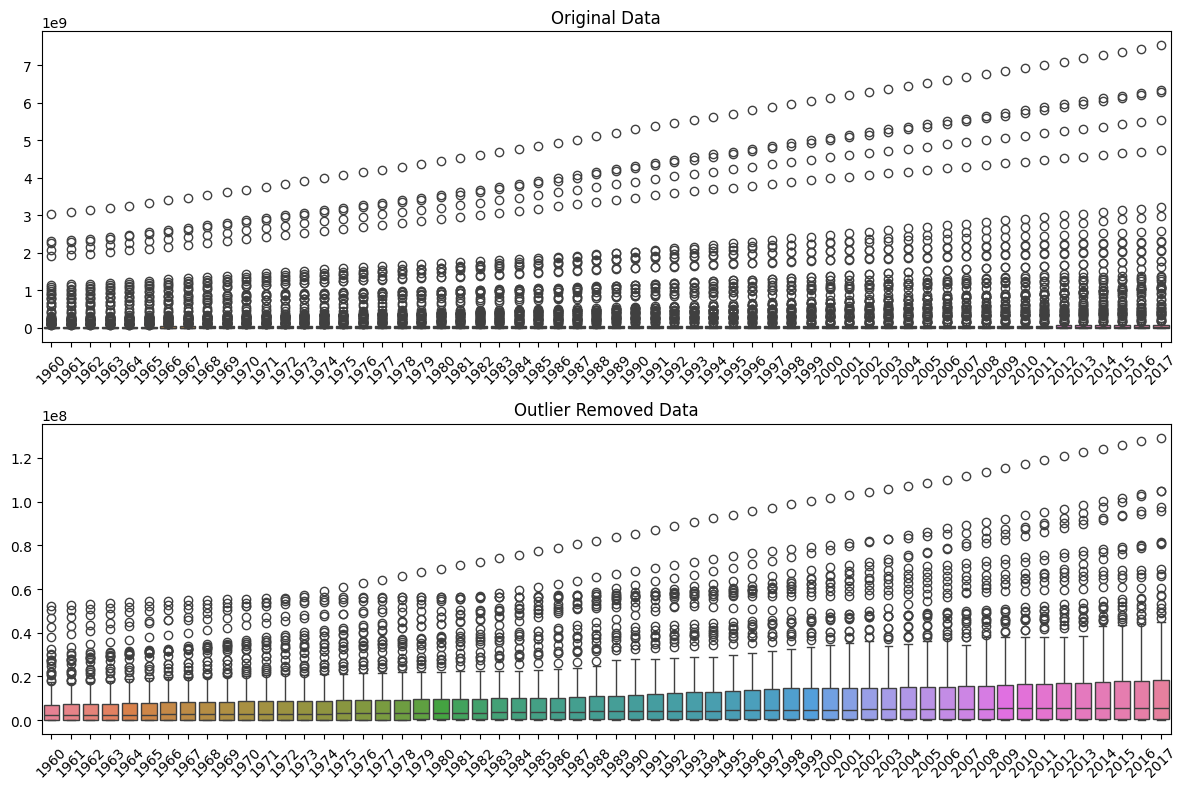

In [39]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1) 
sns.boxplot(data=population_data)
plt.title('Original Data')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2) 
sns.boxplot(data=pops_dat)
plt.title('Outlier Removed Data')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

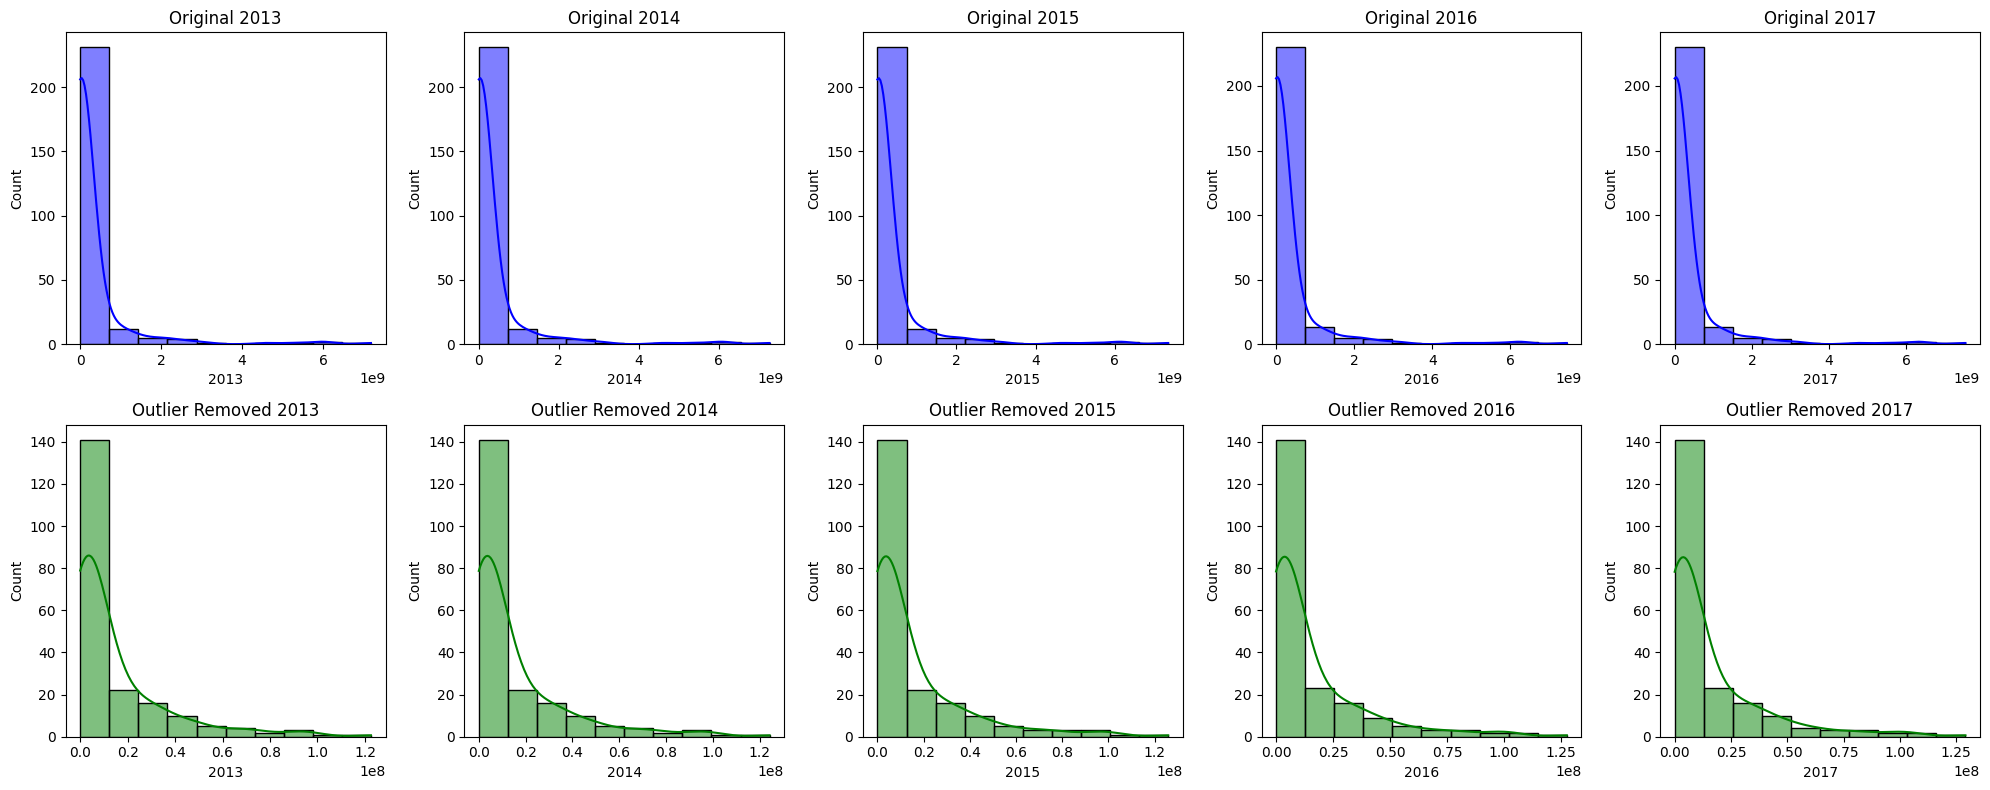

In [40]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# original
sns.histplot(population_data['2013'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Original 2013')
sns.histplot(population_data['2014'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 1])
axs[0, 1].set_title('Original 2014')
sns.histplot(population_data['2015'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 2])
axs[0, 2].set_title('Original 2015')
sns.histplot(population_data['2016'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 3])
axs[0, 3].set_title('Original 2016')
sns.histplot(population_data['2017'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 4])
axs[0, 4].set_title('Original 2017')

# removed
sns.histplot(pops_dat['2013'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Outlier Removed 2013')
sns.histplot(pops_dat['2014'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 1])
axs[1, 1].set_title('Outlier Removed 2014')
sns.histplot(pops_dat['2015'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 2])
axs[1, 2].set_title('Outlier Removed 2015')
sns.histplot(pops_dat['2016'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 3])
axs[1, 3].set_title('Outlier Removed 2016')
sns.histplot(pops_dat['2017'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 4])
axs[1, 4].set_title('Outlier Removed 2017')

plt.tight_layout()
plt.show()

##### 2.7.3 gdp_data

In [41]:
gdp_data = remove_outliers(gdp_csv_df).sort_values(by="Country Name").reset_index()
gdp_data.drop("index", axis=1, inplace=True)
gdp_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,6.220172e+09,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,...,1.710007e+11,1.372110e+11,1.612073e+11,2.000191e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658743e+11,1.590491e+11,1.703708e+11
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,5.805333e+08,5.805333e+08,5.805333e+08,5.805333e+08,5.805333e+08,5.805333e+08,...,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08,5.805333e+08
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,1.501056e+09,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Virgin Islands (U.S.),VIR,GDP (current US$),NY.GDP.MKTP.CD,2.420000e+07,2.570000e+07,3.690000e+07,4.140000e+07,5.380000e+07,6.650000e+07,...,4.250000e+09,4.203000e+09,4.339000e+09,4.239000e+09,4.095000e+09,3.764000e+09,3.624000e+09,3.765000e+09,1.632083e+09,1.632083e+09
185,West Bank and Gaza,PSE,GDP (current US$),NY.GDP.MKTP.CD,6.976688e+09,6.976688e+09,6.976688e+09,6.976688e+09,6.976688e+09,6.976688e+09,...,6.673500e+09,7.268200e+09,8.913100e+09,1.046540e+10,1.127940e+10,1.247600e+10,1.271560e+10,1.267300e+10,1.342570e+10,1.449810e+10
186,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,1.701070e+10,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,1.701070e+10
187,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


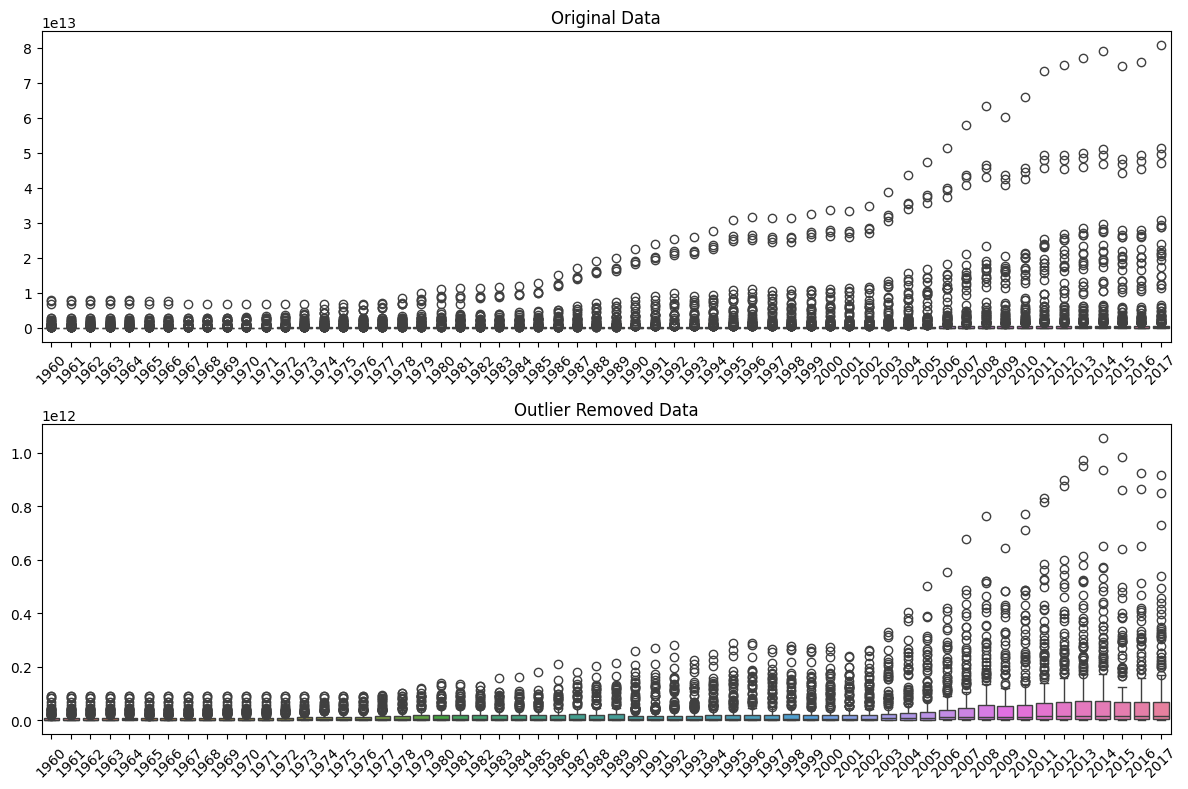

In [42]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1) 
sns.boxplot(data=gdp_csv_df)
plt.title('Original Data')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2) 
sns.boxplot(data=gdp_data)
plt.title('Outlier Removed Data')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

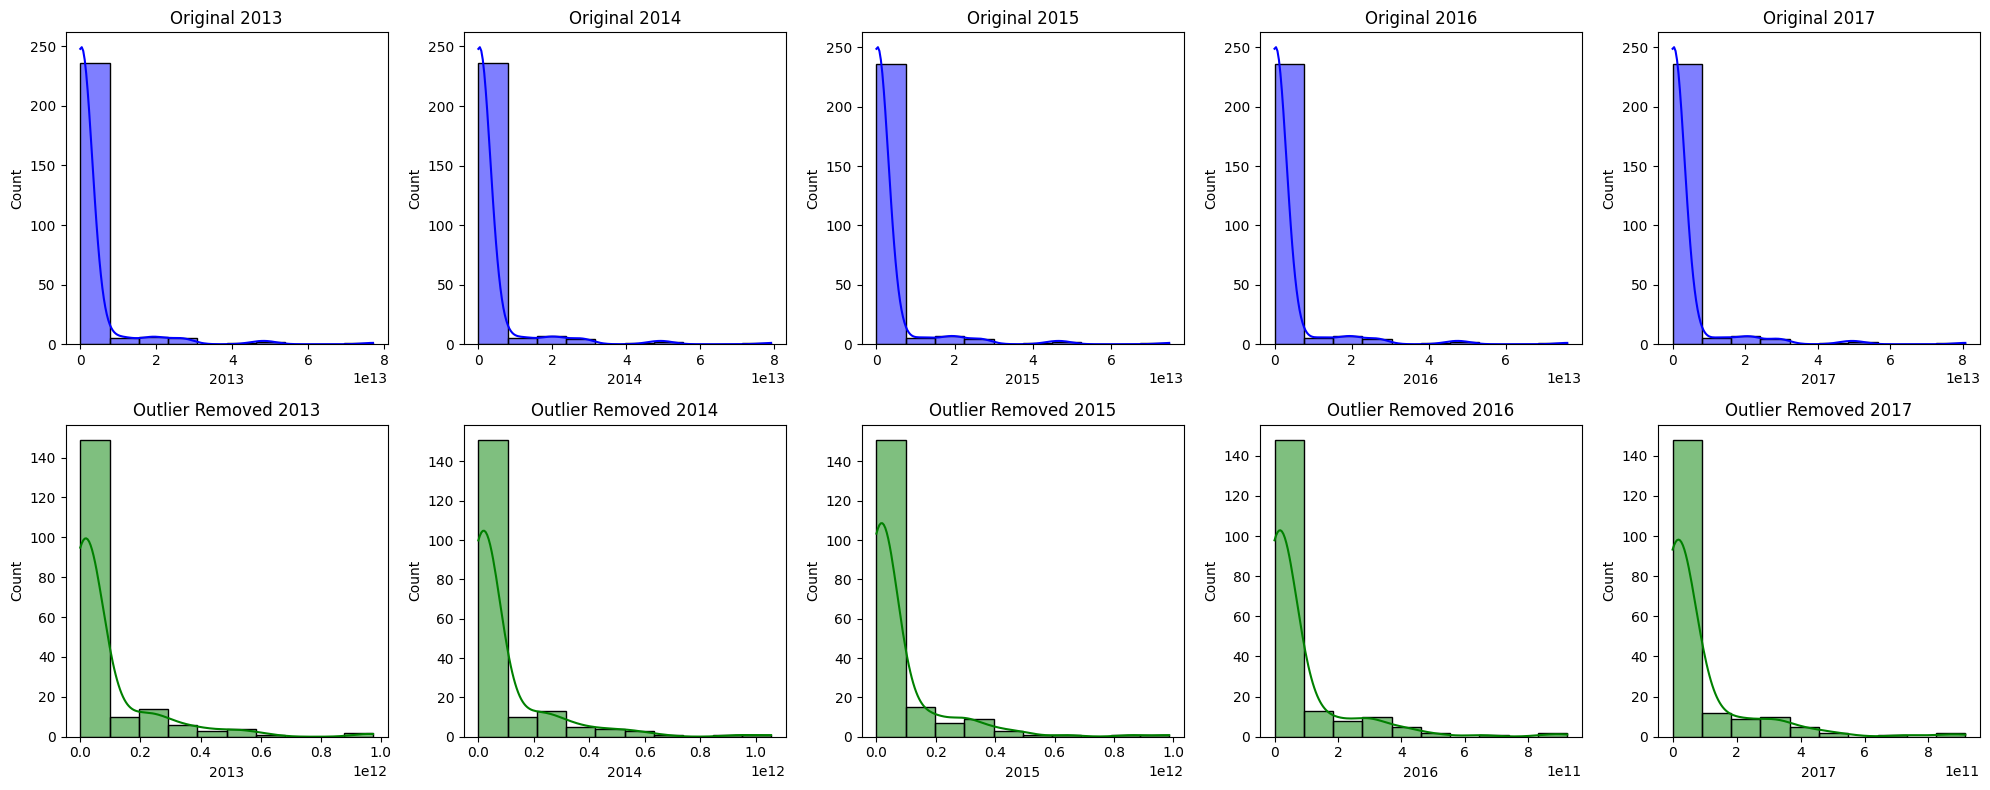

In [43]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# original
sns.histplot(gdp_csv_df['2013'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Original 2013')
sns.histplot(gdp_csv_df['2014'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 1])
axs[0, 1].set_title('Original 2014')
sns.histplot(gdp_csv_df['2015'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 2])
axs[0, 2].set_title('Original 2015')
sns.histplot(gdp_csv_df['2016'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 3])
axs[0, 3].set_title('Original 2016')
sns.histplot(gdp_csv_df['2017'].dropna(), bins=10, kde=True, color='blue', ax=axs[0, 4])
axs[0, 4].set_title('Original 2017')

# removed
sns.histplot(gdp_data['2013'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Outlier Removed 2013')
sns.histplot(gdp_data['2014'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 1])
axs[1, 1].set_title('Outlier Removed 2014')
sns.histplot(gdp_data['2015'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 2])
axs[1, 2].set_title('Outlier Removed 2015')
sns.histplot(gdp_data['2016'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 3])
axs[1, 3].set_title('Outlier Removed 2016')
sns.histplot(gdp_data['2017'].dropna(), bins=10, kde=True, color='green', ax=axs[1, 4])
axs[1, 4].set_title('Outlier Removed 2017')

plt.tight_layout()
plt.show()

#### 2.8 Melakukan scaling features dengan metode MinMax Scaler pada dataset gdp_data dan population_data

##### Function minmax_scaler di bawah ini digunakan untuk melakukan scaling features dengan metode MinMax Scaler

In [44]:
def minmax_scaler(df):
   # Inisialisasi MinMaxScaler
   scaler = MinMaxScaler()

   # Filter hanya kolom-kolom numerik yang akan di-scaling
   numerical_columns = df.select_dtypes(include=['float64', 'int64'])
   numerical_columns.columns = numerical_columns.columns.astype(str)

   # Lakukan scaling pada kolom numerik
   scaled_values = scaler.fit_transform(numerical_columns)

   # Buat DataFrame baru dari hasil scaling
   scaled_df = pd.DataFrame(scaled_values, columns=numerical_columns.columns, index=numerical_columns.index)

   # Update DataFrame hasil scaling dengan DataFrame asli
   for column in scaled_df.columns:
      df[column] = scaled_df[column]

   return df


##### 2.8.1 population_data

In [45]:
scaled_population_data = minmax_scaler(pops_dat)
scaled_population_data.to_csv("data-dest/fixed_population_data.csv")
scaled_population_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,0.171618,0.173543,0.175439,0.177635,0.180138,0.182793,...,0.240067,0.242386,0.245447,0.249400,0.253991,0.258893,0.263642,0.267918,0.271662,0.275016
1,Albania,ALB,"Population, total",SP.POP.TOTL,0.030623,0.031354,0.032054,0.032770,0.033510,0.034226,...,0.025845,0.025261,0.024747,0.024313,0.023921,0.023540,0.023172,0.022797,0.022465,0.022162
2,Algeria,DZA,"Population, total",SP.POP.TOTL,0.212243,0.215935,0.219466,0.223327,0.227635,0.232267,...,0.306645,0.306989,0.307799,0.309116,0.310844,0.312815,0.314807,0.316655,0.318319,0.319832
3,American Samoa,ASM,"Population, total",SP.POP.TOTL,0.000300,0.000304,0.000311,0.000321,0.000332,0.000344,...,0.000414,0.000401,0.000389,0.000380,0.000372,0.000363,0.000358,0.000354,0.000349,0.000344
4,Andorra,AND,"Population, total",SP.POP.TOTL,0.000174,0.000188,0.000203,0.000219,0.000236,0.000252,...,0.000650,0.000645,0.000634,0.000619,0.000597,0.000571,0.000550,0.000532,0.000519,0.000509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Upper middle income,,"Population, total",SP.POP.TOTL,0.623455,0.637598,0.651316,0.665807,0.681101,0.696594,...,0.762837,0.758087,0.754099,0.750979,0.748577,0.746679,0.744976,0.743252,0.741461,0.739668
201,Uruguay,URY,"Population, total",SP.POP.TOTL,0.000539,0.000565,0.000572,0.000655,0.000668,0.000711,...,0.000866,0.000853,0.000838,0.000825,0.000810,0.000794,0.000781,0.000768,0.000756,0.000744
202,Vanuatu,VUT,"Population, total",SP.POP.TOTL,0.098631,0.099555,0.100426,0.101433,0.102576,0.103763,...,0.196622,0.198839,0.201151,0.203579,0.206093,0.208655,0.211217,0.213737,0.216210,0.218651
203,"Venezuela, RB",VEN,"Population, total",SP.POP.TOTL,0.058031,0.059395,0.060776,0.062270,0.063861,0.065483,...,0.115023,0.116424,0.117979,0.119707,0.121585,0.123586,0.125674,0.127817,0.130012,0.132270


##### 2.8.2 gdp_data

In [46]:
scaled_gdp_data = minmax_scaler(gdp_data)
scaled_gdp_data.to_csv("data-dest/fixed_gdp_data.csv")
scaled_gdp_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,0.005741,0.005867,0.005870,0.008084,0.008597,0.010845,...,0.013293,0.019329,0.020606,0.021492,0.022848,0.020773,0.019502,0.019456,0.021031,0.022698
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,0.067794,0.067799,0.067824,0.067806,0.067787,0.067778,...,0.016814,0.018642,0.015411,0.015438,0.013689,0.013083,0.012500,0.011515,0.012822,0.014203
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,0.029612,0.026462,0.021756,0.029399,0.031632,0.034101,...,0.223694,0.212816,0.208812,0.240221,0.232973,0.215381,0.202583,0.168226,0.172092,0.186093
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,0.006208,0.006213,0.006240,0.006221,0.006201,0.006191,...,0.000697,0.001010,0.000705,0.000643,0.000676,0.000620,0.000574,0.000632,0.000673,0.000591
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,0.016261,0.016265,0.016292,0.016273,0.016253,0.016244,...,0.005203,0.005637,0.004306,0.004088,0.003485,0.003332,0.003140,0.002816,0.003074,0.003248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Virgin Islands (U.S.),VIR,GDP (current US$),NY.GDP.MKTP.CD,0.000133,0.000154,0.000303,0.000334,0.000449,0.000578,...,0.005521,0.006478,0.005580,0.005045,0.004522,0.003827,0.003399,0.003783,0.001727,0.001740
185,West Bank and Gaza,PSE,GDP (current US$),NY.GDP.MKTP.CD,0.076056,0.076060,0.076085,0.076068,0.076049,0.076040,...,0.008692,0.011233,0.011506,0.012525,0.012530,0.012774,0.012015,0.012819,0.014490,0.015796
186,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,0.185629,0.185633,0.185655,0.185640,0.185623,0.185615,...,0.035170,0.038943,0.040000,0.039265,0.039416,0.041468,0.040931,0.035064,0.019672,0.018541
187,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,0.007655,0.007477,0.007469,0.007730,0.009028,0.011677,...,0.023395,0.023737,0.026214,0.028134,0.028384,0.028764,0.025694,0.021423,0.022639,0.028153


### 2.9 Melakukan pengecekan perubahan data sebelum dan setelah proses transformasi

#### 2.9.1 projects_data

In [47]:
projects_data_csv_df.describe()

,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt
count,1.633400e+04,1.642700e+04,1.642700e+04,1.642700e+04,1.642700e+04
mean,1.243118e+08,4.220742e+07,2.171818e+07,6.392561e+07,1.492170e+06
std,9.177951e+08,1.221945e+08,5.511842e+07,1.283262e+08,1.505919e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.977500e+06,0.000000e+00,0.000000e+00,5.000000e+06,0.000000e+00
50%,2.900000e+07,0.000000e+00,0.000000e+00,2.280000e+07,0.000000e+00
75%,9.000000e+07,3.000000e+07,1.970000e+07,7.000000e+07,0.000000e+00
max,9.300700e+10,3.750000e+09,1.200000e+09,3.750000e+09,1.329000e+09


In [48]:
projects_data.describe()

,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt
count,8.872000e+03,8.872000e+03,8.872000e+03,8.872000e+03,8872.0
mean,2.803141e+07,1.266317e+07,9.623104e+06,2.228628e+07,0.0
std,2.694083e+07,1.935811e+07,1.238561e+07,1.741552e+07,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.000000e+07,0.000000e+00,0.000000e+00,8.500000e+06,0.0
50%,2.011000e+07,0.000000e+00,4.000000e+06,1.830000e+07,0.0
75%,3.866250e+07,2.100000e+07,1.600000e+07,3.100000e+07,0.0
max,2.094000e+08,7.500000e+07,4.920000e+07,1.040000e+08,0.0


#### 2.9.2 population_data (csv)

In [49]:
population_data_csv_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,...,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02
mean,1.187114e+08,1.203067e+08,1.224392e+08,1.250938e+08,1.277696e+08,1.305121e+08,1.334009e+08,1.362846e+08,1.392195e+08,1.422978e+08,...,2.752573e+08,2.788327e+08,2.824302e+08,2.860161e+08,2.896949e+08,2.934256e+08,2.971856e+08,3.009550e+08,3.047464e+08,3.085338e+08
std,3.731383e+08,3.776155e+08,3.841951e+08,3.927714e+08,4.013928e+08,4.102529e+08,4.196832e+08,4.290671e+08,4.386571e+08,4.487308e+08,...,8.665661e+08,8.771557e+08,8.878137e+08,8.985130e+08,9.094115e+08,9.204402e+08,9.315346e+08,9.426397e+08,9.538015e+08,9.649513e+08
min,4.279000e+03,4.453000e+03,4.566000e+03,4.656000e+03,4.748000e+03,4.841000e+03,4.936000e+03,5.033000e+03,5.161000e+03,5.303000e+03,...,9.947000e+03,9.945000e+03,1.002500e+04,1.005700e+04,1.027900e+04,1.081900e+04,1.090800e+04,1.100100e+04,1.109700e+04,1.119200e+04
25%,5.313490e+05,5.441592e+05,5.575528e+05,5.684930e+05,5.791700e+05,5.850220e+05,5.926342e+05,6.017695e+05,6.120805e+05,6.229948e+05,...,1.350153e+06,1.380248e+06,1.387576e+06,1.400130e+06,1.415726e+06,1.431560e+06,1.447306e+06,1.471523e+06,1.522803e+06,1.577113e+06
50%,3.720409e+06,3.817784e+06,3.920245e+06,4.050336e+06,4.172302e+06,4.279066e+06,4.335242e+06,4.392265e+06,4.427282e+06,4.501523e+06,...,9.563920e+06,9.714708e+06,9.908114e+06,9.999411e+06,1.003766e+07,1.014287e+07,1.034389e+07,1.044324e+07,1.054522e+07,1.067587e+07
75%,2.595786e+07,2.681488e+07,2.768918e+07,2.857802e+07,2.946820e+07,3.033314e+07,3.111964e+07,3.152311e+07,3.193057e+07,3.229729e+07,...,5.672308e+07,5.706423e+07,5.735423e+07,5.760047e+07,5.790434e+07,5.861731e+07,5.922675e+07,5.937074e+07,5.947449e+07,5.974107e+07
max,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,3.394784e+09,3.464689e+09,3.535355e+09,3.610179e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09


In [50]:
scaled_population_data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.108018,0.109388,0.110703,0.112137,0.113697,0.115259,0.116919,0.118620,0.120379,0.122212,...,0.116773,0.116764,0.116796,0.116904,0.117060,0.117279,0.117528,0.117778,0.118047,0.118336
std,0.176602,0.178322,0.179962,0.181815,0.183866,0.185910,0.188073,0.190274,0.192569,0.194983,...,0.175032,0.174764,0.174632,0.174678,0.174842,0.175156,0.175524,0.175874,0.176247,0.176658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003780,0.003817,0.003875,0.003957,0.004058,0.004170,0.004229,0.004215,0.004203,0.004249,...,0.005341,0.005267,0.005195,0.005123,0.005052,0.004982,0.004918,0.004855,0.004793,0.004734
50%,0.041378,0.042645,0.043738,0.044622,0.045749,0.047074,0.047948,0.048367,0.049685,0.049922,...,0.046711,0.046524,0.045874,0.045250,0.044726,0.044302,0.045023,0.045063,0.044828,0.044586
75%,0.136211,0.137992,0.139840,0.141665,0.143373,0.146239,0.148334,0.150323,0.151512,0.152046,...,0.137825,0.139251,0.139934,0.140099,0.138902,0.139252,0.141494,0.141021,0.141775,0.143480
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 2.9.3 gdp_data

In [51]:
gdp_csv_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,...,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.560000e+02
mean,2.251486e+11,2.264669e+11,2.289233e+11,2.321102e+11,2.362353e+11,2.049413e+11,2.090205e+11,1.836916e+11,1.795577e+11,1.862185e+11,...,1.974061e+12,1.872139e+12,2.082108e+12,2.338373e+12,2.402444e+12,2.488514e+12,2.561125e+12,2.408302e+12,2.435378e+12,2.604156e+12
std,8.905730e+11,8.916146e+11,8.934496e+11,8.955853e+11,8.986592e+11,7.604063e+11,7.659387e+11,6.181120e+11,6.228420e+11,6.350067e+11,...,7.070377e+12,6.677977e+12,7.234730e+12,8.005480e+12,8.161991e+12,8.397256e+12,8.626710e+12,8.171051e+12,8.294429e+12,8.807851e+12
min,1.201203e+07,1.159202e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,...,3.029022e+07,2.710108e+07,3.182352e+07,3.871183e+07,3.767173e+07,3.750912e+07,3.729059e+07,3.555604e+07,3.657261e+07,3.973132e+07
25%,7.518653e+08,7.637645e+08,7.742545e+08,7.962628e+08,8.801580e+08,8.477548e+08,9.124173e+08,9.508475e+08,9.543686e+08,9.683039e+08,...,5.997972e+09,5.798460e+09,6.570327e+09,6.951803e+09,7.462314e+09,7.925228e+09,8.176447e+09,7.826304e+09,7.442976e+09,8.126303e+09
50%,5.129087e+09,5.129087e+09,5.241962e+09,5.437229e+09,5.644582e+09,5.161605e+09,5.396142e+09,5.608815e+09,5.377948e+09,5.773923e+09,...,3.123774e+10,3.458317e+10,3.887620e+10,4.210882e+10,4.445634e+10,4.796066e+10,4.991320e+10,4.752450e+10,4.500974e+10,4.874367e+10
75%,3.895300e+10,3.922381e+10,4.169402e+10,4.286597e+10,4.304559e+10,4.242109e+10,4.242109e+10,4.166873e+10,3.725084e+10,3.725084e+10,...,4.383593e+11,4.164488e+11,4.715717e+11,5.274644e+11,5.186420e+11,5.236852e+11,5.474920e+11,4.852791e+11,4.789951e+11,5.278923e+11
max,7.850356e+12,7.850356e+12,7.850356e+12,7.850356e+12,7.850356e+12,7.560140e+12,7.560140e+12,6.899169e+12,6.899169e+12,6.899169e+12,...,6.343346e+13,6.013844e+13,6.595667e+13,7.329734e+13,7.496562e+13,7.705059e+13,7.913144e+13,7.484273e+13,7.593681e+13,8.068379e+13


In [52]:
scaled_gdp_data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.093330,0.093765,0.094260,0.095256,0.096471,0.090233,0.091604,0.092387,0.089618,0.091829,...,0.085552,0.093700,0.089453,0.092670,0.089542,0.086117,0.081433,0.077631,0.082265,0.087487
std,0.176822,0.176708,0.176784,0.176758,0.176775,0.170919,0.171175,0.171515,0.165034,0.165663,...,0.158107,0.170952,0.166831,0.171917,0.165958,0.159630,0.151583,0.145750,0.153969,0.160878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005411,0.005228,0.005205,0.005472,0.005786,0.004996,0.004580,0.004750,0.004985,0.005050,...,0.005203,0.005652,0.005580,0.005405,0.004522,0.004645,0.004213,0.004075,0.003753,0.004064
50%,0.022115,0.022675,0.022938,0.025365,0.027113,0.022757,0.023062,0.022065,0.022079,0.023244,...,0.016701,0.018642,0.017049,0.018792,0.016454,0.016413,0.016038,0.014592,0.016896,0.018369
75%,0.076056,0.079719,0.084596,0.089531,0.089512,0.073691,0.076031,0.080682,0.082745,0.091310,...,0.073033,0.079650,0.074094,0.074880,0.075890,0.073268,0.068693,0.067831,0.073324,0.075704
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.10 Feature Engineering dengan menambahkan kolom gdppercapita yang valuenya berasal dari gdp/population

#### 2.10.1 Melakukan transformasi data untuk mempermudah perhitungan gdppercapita

In [53]:
scaled_population_data_melted = pd.melt(scaled_population_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value').sort_values(by='Country Name').reset_index()
scaled_population_data_melted.drop("index", axis=1, inplace=True)
scaled_population_data_melted

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,0.171618
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1974,0.208447
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1989,0.140624
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,2012,0.253991
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1975,0.206749
...,...,...,...,...,...,...
11885,Viet Nam,VNM,"Population, total",SP.POP.TOTL,1992,0.120174
11886,Viet Nam,VNM,"Population, total",SP.POP.TOTL,1991,0.119845
11887,Viet Nam,VNM,"Population, total",SP.POP.TOTL,1990,0.119206
11888,Viet Nam,VNM,"Population, total",SP.POP.TOTL,1987,0.115346


In [54]:
scaled_gdp_data_melted = pd.melt(scaled_gdp_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value').sort_values(by='Country Name').reset_index()
scaled_gdp_data_melted.drop("index", axis=1, inplace=True)
scaled_gdp_data_melted

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,0.005741
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1979,0.030223
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1978,0.031841
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2010,0.020606
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1977,0.031480
...,...,...,...,...,...,...
10957,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1992,0.024052
10958,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1991,0.031929
10959,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1990,0.033992
10960,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1987,0.037244


In [55]:
gdp_percapita = pd.merge(scaled_gdp_data_melted, scaled_population_data_melted, on=["Country Name", "Country Code", "Year"], how='inner', suffixes=("_GDP", "_POP"))
gdp_percapita

,Country Name,Country Code,Indicator Name_GDP,Indicator Code_GDP,Year,Value_GDP,Indicator Name_POP,Indicator Code_POP,Value_POP
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,0.005741,"Population, total",SP.POP.TOTL,0.171618
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1979,0.030223,"Population, total",SP.POP.TOTL,0.196440
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1978,0.031841,"Population, total",SP.POP.TOTL,0.200367
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2010,0.020606,"Population, total",SP.POP.TOTL,0.245447
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1977,0.031480,"Population, total",SP.POP.TOTL,0.202999
...,...,...,...,...,...,...,...,...,...
8811,"Venezuela, RB",VEN,GDP (current US$),NY.GDP.MKTP.CD,1980,0.478315,"Population, total",SP.POP.TOTL,0.084808
8812,"Venezuela, RB",VEN,GDP (current US$),NY.GDP.MKTP.CD,2006,0.332066,"Population, total",SP.POP.TOTL,0.112401
8813,"Venezuela, RB",VEN,GDP (current US$),NY.GDP.MKTP.CD,2013,0.380986,"Population, total",SP.POP.TOTL,0.123586
8814,"Venezuela, RB",VEN,GDP (current US$),NY.GDP.MKTP.CD,1986,0.281107,"Population, total",SP.POP.TOTL,0.090747


#### 2.10.2 Menghitung gdppercapita

In [56]:
gdp_percapita["gdppercapita"] = gdp_percapita["Value_GDP"]/gdp_percapita["Value_POP"]
gdp_percapita.to_csv("data-dest/gdp_percapita.csv")
gdp_percapita

,Country Name,Country Code,Indicator Name_GDP,Indicator Code_GDP,Year,Value_GDP,Indicator Name_POP,Indicator Code_POP,Value_POP,gdppercapita
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,0.005741,"Population, total",SP.POP.TOTL,0.171618,0.033455
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1979,0.030223,"Population, total",SP.POP.TOTL,0.196440,0.153856
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1978,0.031841,"Population, total",SP.POP.TOTL,0.200367,0.158914
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2010,0.020606,"Population, total",SP.POP.TOTL,0.245447,0.083952
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1977,0.031480,"Population, total",SP.POP.TOTL,0.202999,0.155077
...,...,...,...,...,...,...,...,...,...,...
8811,"Venezuela, RB",VEN,GDP (current US$),NY.GDP.MKTP.CD,1980,0.478315,"Population, total",SP.POP.TOTL,0.084808,5.639958
8812,"Venezuela, RB",VEN,GDP (current US$),NY.GDP.MKTP.CD,2006,0.332066,"Population, total",SP.POP.TOTL,0.112401,2.954296
8813,"Venezuela, RB",VEN,GDP (current US$),NY.GDP.MKTP.CD,2013,0.380986,"Population, total",SP.POP.TOTL,0.123586,3.082758
8814,"Venezuela, RB",VEN,GDP (current US$),NY.GDP.MKTP.CD,1986,0.281107,"Population, total",SP.POP.TOTL,0.090747,3.097693


In [57]:
missing = gdp_percapita.isnull().sum()
missing

Country Name          0
Country Code          0
Indicator Name_GDP    0
Indicator Code_GDP    0
Year                  0
Value_GDP             0
Indicator Name_POP    0
Indicator Code_POP    0
Value_POP             0
gdppercapita          0
dtype: int64

## 3. Load

#### 3.1 Mengubah format dataframe untuk mendukung penggabungan kolom-kolom

In [58]:
data_type(gdp_percapita, ["Year"], 'numeric')

projects_data = projects_data.rename(columns={"countryname": "Country Name"})
projects_data

,id,regionname,Country Name,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,status,project_name,...,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector,mjsector
0,P164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,N,L,Active,Grenada First Fiscal Resilience and Blue Growt...,...,June,2019-12-31 00:00:00+00:00,35000000.0,0,30000000,30000000,0,http://projects.worldbank.org/P164289?lang=en,Other Public Administration,Public Administration
1,P154525,South Asia,Republic of India,PE,Investment Project Financing,IN,N,L,Active,Uttarakhand Workforce Development Project,...,June,2023-06-30 00:00:00+00:00,92500000.0,74000000,0,74000000,0,http://projects.worldbank.org/P154525?lang=en,Workforce Development and Vocational Education,Education
2,P167330,East Asia and Pacific,Kingdom of Tonga,PE,Development Policy Lending,AD,N,L,Active,Tonga Second Inclusive Growth Development Poli...,...,June,2018-12-31 00:00:00+00:00,10000000.0,0,10000000,10000000,0,http://projects.worldbank.org/P167330?lang=en,Energy Transmission and Distribution,Energy and Extractives
3,P159692,Middle East and North Africa,Lebanese Republic,PE,Investment Project Financing,IN,N,L,Active,Land Administration System Modernization,...,June,2023-12-31 00:00:00+00:00,43000000.0,43000000,0,43000000,0,http://projects.worldbank.org/P159692?lang=en,Other Public Administration,Public Administration
4,P165558,Middle East and North Africa,Republic of Djibouti,PE,Investment Project Financing,IN,N,L,Active,Djibouti Support for Women and Youth Entrepren...,...,June,2023-12-31 00:00:00+00:00,15000000.0,0,15000000,15000000,0,http://projects.worldbank.org/P165558?lang=en,Other Industry,Industry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867,P037455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,N,L,Closed,Holland America Lijn Project,...,July,1948-08-03 00:00:00+00:00,2000000.0,2000000,0,2000000,0,http://projects.worldbank.org/P037455/holland-...,(Historic)Transportation adjustment,Transportation
8868,P006577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,N,L,Closed,Agricultural Machinery Project,...,March,1950-01-01 00:00:00+00:00,2500000.0,2500000,0,2500000,0,http://projects.worldbank.org/P006577/agricult...,(Historic)Agriculture adjustment,Agriculture
8869,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,N,L,Closed,Power and Irrigation Project,...,March,1954-12-31 00:00:00+00:00,13500000.0,13500000,0,13500000,0,http://projects.worldbank.org/P006578/power-ir...,(Historic)Hydro,(Historic)Electric Power & Other Energy
8870,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,N,L,Closed,Steel Mill and Railway Project,...,August,1949-03-31 00:00:00+00:00,12000000.0,12000000,0,12000000,0,http://projects.worldbank.org/P037451/steel-mi...,(Historic)Economic management,(Historic)Multisector


#### 3.2 Menggabungkan lalu menghapus kolom-kolom yang tidak diperlukan dari data world_bank

In [59]:
rural_elec_gdp = pd.merge(rural_elec_df, gdp_percapita, on=["Country Name", "Country Code", "Year"], how='inner')
rural_elec_gdp.drop(columns=["Indicator Name_rural", "Indicator Code_rural", "Indicator Name_electricity", "Indicator Code_electricity",
                             "Indicator Name_GDP", "Indicator Code_GDP", "Indicator Name_POP", "Indicator Code_POP"], axis=1, inplace=True)

world_bank = pd.merge(rural_elec_gdp, projects_data, on=["Country Name"], how='inner')
world_bank.drop(columns=["id", "regionname", "prodline", "lendinginstr", "lendinginstrtype", "supplementprojectflg", "productlinetype", "status", 
                         "project_name", "boardapprovaldate", "board_approval_month", "closingdate", "ibrdcommamt", "idacommamt", "totalamt", 
                         "grantamt", "url", "sector", "mjsector"], axis=1, inplace=True)

world_bank = world_bank.rename(columns={"Country Name": "countryname",
                                        "Country Code": "countrycode",
                                        "Year": "year",
                                        "Value_GDP": "gdp",
                                        "Value_POP": "population",
                                        "Value_rural": "ruralpopulationpercent",
                                        "Value_electricity": "electricityaccesspercent",
                                        "lendprojectcost": "projectcost"
                                        })
world_bank.sort_values(by=['countrycode'], inplace=True)
world_bank.reset_index(drop=True, inplace=True)
world_bank.to_csv("data-dest/final_world_bank_data.csv")
world_bank

,countryname,countrycode,year,ruralpopulationpercent,electricityaccesspercent,gdp,population,gdppercapita,projectcost
0,Antigua and Barbuda,ATG,2002,68.901,90.868484,0.003028,0.000734,4.123350,10000000.0
1,Antigua and Barbuda,ATG,2012,74.865,95.254692,0.001308,0.000716,1.827308,10000000.0
2,Antigua and Barbuda,ATG,2016,76.607,97.354668,0.001541,0.000705,2.186365,10000000.0
3,Antigua and Barbuda,ATG,2006,71.393,92.434402,0.002053,0.000729,2.816625,10000000.0
4,Antigua and Barbuda,ATG,1998,67.145,89.203552,0.002593,0.000714,3.632351,10000000.0
...,...,...,...,...,...,...,...,...,...
21892,Samoa,WSM,2004,78.543,91.106529,0.000985,0.102313,0.009630,49940000.0
21893,Samoa,WSM,2004,78.543,91.106529,0.000985,0.102313,0.009630,13940000.0
21894,Samoa,WSM,2004,78.543,91.106529,0.000985,0.102313,0.009630,7500000.0
21895,Samoa,WSM,2006,79.019,96.371730,0.000879,0.104891,0.008380,49940000.0


In [60]:
data_type(world_bank, ["countryname", "countrycode"], 'string')
world_bank.dtypes

countryname                 string[python]
countrycode                 string[python]
year                                 int64
ruralpopulationpercent             float64
electricityaccesspercent           float64
gdp                                float64
population                         float64
gdppercapita                       float64
projectcost                        float64
dtype: object

#### 3.3 Melakukan load data ke cloud storage (Firebase Google Storage)

In [61]:
env_values = dotenv_values('.env')
accountkey_path = env_values['ACCOUNTKEY_JSON_PATH']
storage_bucket = env_values['STORAGE_BUCKET']

cred = credentials.Certificate(accountkey_path)
firebase_admin.initialize_app(cred, {"storageBucket": storage_bucket})

bucket = storage.bucket()
blob = bucket.blob(blob_name="final_world_bank_data.csv")
blob.upload_from_filename(filename="data-dest/final_world_bank_data.csv")

blob = bucket.blob(blob_name="fixed_gdp_data.csv")
blob.upload_from_filename(filename="data-dest/fixed_gdp_data.csv")

blob = bucket.blob(blob_name="fixed_population_data.csv")
blob.upload_from_filename(filename="data-dest/fixed_population_data.csv")

blob = bucket.blob(blob_name="fixed_projects_data.csv")
blob.upload_from_filename(filename="data-dest/fixed_projects_data.csv")

blob = bucket.blob(blob_name="gdp_percapita.csv")
blob.upload_from_filename(filename="data-dest/gdp_percapita.csv")

#### Melakukan load data ke local database (MySQL Workbench)

In [63]:
connection = connect( host=env_values['DB_HOST'],
                     db=env_values['DB_DATABASE'],
                     user=env_values['DB_USERNAME'],
                     password=env_values['DB_PASSWORD'],
                     )
cursor = connection.cursor()

with connection.cursor() as cursor:
   cursor.execute("""
                  CREATE TABLE IF NOT EXISTS world_bank (
                  world_bank_id INT AUTO_INCREMENT PRIMARY KEY,
                  countryname VARCHAR(255) NOT NULL,
                  countrycode VARCHAR(255) NOT NULL,
                  year INT NOT NULL,
                  ruralpopulationpercent INT NOT NULL,
                  electricityaccesspercent INT NOT NULL,
                  gdp INT NOT NULL,
                  population INT NOT NULL,
                  gdppercapita INT NOT NULL,
                  projectcost INT NOT NULL)
                  """)
   cursor.execute("""
                  CREATE TABLE IF NOT EXISTS gdp_percapita (
                  gdp_percapita_id INT AUTO_INCREMENT PRIMARY KEY,
                  countryname VARCHAR(255) NOT NULL,
                  countrycode VARCHAR(255) NOT NULL,
                  indicator_name_gdp VARCHAR(255) NOT NULL,
                  indicator_code_gdp VARCHAR(255) NOT NULL,
                  year INT NOT NULL,
                  value_gdp INT NOT NULL,
                  indicator_name_pop VARCHAR(255) NOT NULL,
                  indicator_code_pop VARCHAR(255) NOT NULL,
                  value_pop INT NOT NULL,
                  gdppercapita INT NOT NULL)
                  """)
connection.commit()

try:
   with connection.cursor() as cursor:
      for index, row in world_bank.iterrows():
         values = tuple(row)
         placeholders = ', '.join(['%s'] * len(values))
         columns = ', '.join(world_bank.columns)
         sql = f"INSERT INTO world_bank ({columns}) VALUES ({placeholders})"
         cursor.execute(sql, values)
   connection.commit()
   print(f"Data berhasil dimasukkan ke dalam tabel world_bank.")
except Exception as e:
   print(f"Error: {e}")

gdp_db = gdp_percapita   
gdp_db.rename(columns = {'Country Name': 'countryname',
                         'Country Code': 'countrycode',
                         'Indicator Name_GDP': 'indicator_name_gdp',
                         'Indicator Code_GDP': 'indicator_code_gdp',
                         'Year': 'year',
                         'Value_GDP': 'value_gdp',
                         'Indicator Name_POP': 'indicator_name_pop',
                         'Indicator Code_POP': 'indicator_code_pop',
                         'Value_POP': 'value_pop',
                         }, inplace = True)   
try:
   with connection.cursor() as cursor:
      for index, row in gdp_db.iterrows():
         values = tuple(row)
         placeholders = ', '.join(['%s'] * len(values))
         columns = ', '.join(gdp_db.columns)
         sql = f"INSERT INTO gdp_percapita ({columns}) VALUES ({placeholders})"
         cursor.execute(sql, values)
   connection.commit()
   print(f"Data berhasil dimasukkan ke dalam tabel gdp_percapita.")
except Exception as e:
   print(f"Error: {e}")

Data berhasil dimasukkan ke dalam tabel world_bank.
Error: inf can not be used with MySQL


In [72]:
print(gdp_db.isnull().sum())

countryname           0
countrycode           0
indicator_name_gdp    0
indicator_code_gdp    0
year                  0
value_gdp             0
indicator_name_pop    0
indicator_code_pop    0
value_pop             0
gdppercapita          0
dtype: int64


## 4. Data Visualization

#### 4.1 Integrasi dan implementasi AI menggunakan Naga AI untuk saran visualisasi

In [64]:
client = OpenAI(
   api_key = env_values['AI_API_KEY'],
   base_url = "https://api.naga.ac/v1"
)

dataset_df = pd.read_csv("data-dest/fixed_population_data.csv")

def generate_analysis(prompt, model="gpt-3.5-turbo", temp=0, max_tokens=150):
   response = client.chat.completions.create(
      model=model,
      temperature=temp,
      max_tokens=max_tokens,
      messages=[
         {
            "role": "user",
            "content": prompt
         }
      ]
   )
   
   return response.choices[0].message.content
   
prompt = f"Berikanlah jenis-jenis visualisasi yang cocok dan kolom apa saja yang akan digunakan berdasarkan file {dataset_df}"
results = generate_analysis(prompt=prompt)
print(results)

Jenis-jenis visualisasi yang cocok untuk data tersebut adalah:

1. Line Chart: Untuk menampilkan perubahan populasi dari tahun ke tahun untuk setiap negara.
2. Bar Chart: Untuk membandingkan populasi antara beberapa negara pada tahun tertentu.
3. Scatter Plot: Untuk melihat hubungan antara populasi dengan tahun secara keseluruhan.
4. Heatmap: Untuk menampilkan perubahan populasi dari tahun ke tahun secara visual.

Kolom yang akan digunakan untuk visualisasi tersebut adalah "Country Name" sebagai sumbu x, tahun-tahun (dari 1960 hingga 2017) sebagai sumbu y, dan


#### 4.2 Visualisasi Rural Population dan Electricity Access in Indonesia

In [65]:
selected_country = 'Indonesia'
filtered_df = rural_elec_df[rural_elec_df['Country Name'] == selected_country].sort_values(by='Year')

fig = go.Figure()
fig.add_trace(go.Scatter(
   x=filtered_df['Year'],
   y=filtered_df['Value_electricity'],
   mode='lines+markers',
   name='Electricity Access'
))
fig.add_trace(go.Scatter(
   x=filtered_df['Year'],
   y=filtered_df['Value_rural'],
   mode='lines+markers',
   name='Rural Population'
))
fig.update_layout(
   title=f'Rural Population and Electricity Access Over Years for {selected_country}',
   xaxis_title='Year',
   yaxis_title='Value'
)

fig.show()

Sebagai bahan referensi:

Hasil sensus penduduk 2020 menunjukkan berdasarkan sensus penduduk P2020, jumlah penduduk Indonesia pada September 2020 sebanyak 270,20 juta jiwa. Kepadatan penduduk Indonesia sebanyak 141 jiwa/km2 pada luas daratan Indonesia yang sebesar 1,9 juta km2. Namun sejak 1961 hingga 2020, rata-rata laju pertumbuhan penduduk Indonesia terus mengalami penurunan. Selama 2010-2020 rata-rata laju pertumbuhan bahkan mencapai angka 1,25 persen.
(Sumber: [upnvj.ac.id](https://www.upnvj.ac.id/id/berita/2023/05/diskusi-kependudukan-indonesia-tantangan-kependudukan-indonesia-dan-global.html#:~:text=Kepadatan%20penduduk%20Indonesia%20sebanyak%20141,mencapai%20angka%201%2C25%20persen.))


#### 4.3 Lineplot Perbandingan Lend Project Cost Indonesia dan Negara Tetangga

In [66]:
neighborhood = ['Republic of Indonesia', 'Malaysia', 'The Independent State of Papua New Guine', 'Democratic Republic of Timor-Leste', 'Republic of Singapore']
filtered_df2 = projects_data[projects_data['Country Name'].isin(neighborhood)]

filtered_df2['boardapprovaldate'] = pd.to_datetime(filtered_df2['boardapprovaldate'])
filtered_df2 = filtered_df2.sort_values(by='boardapprovaldate')
filtered_df3 = filtered_df2.groupby(['boardapprovaldate', 'Country Name']).agg({'lendprojectcost': 'sum'}).reset_index()

fig = px.line(
   filtered_df3, 
   x='boardapprovaldate',
   y='lendprojectcost', 
   color='Country Name',
   title='Lend Project Cost Over Time for Indonesia\'s Neighboring Countries'
)

fig.show()

C:\Users\MATRIX COMPUTER\AppData\Local\Temp\ipykernel_16020\3148076486.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 4.4 Barplot Perbandingan Rural Population Indonesia dan Negara Tetangga

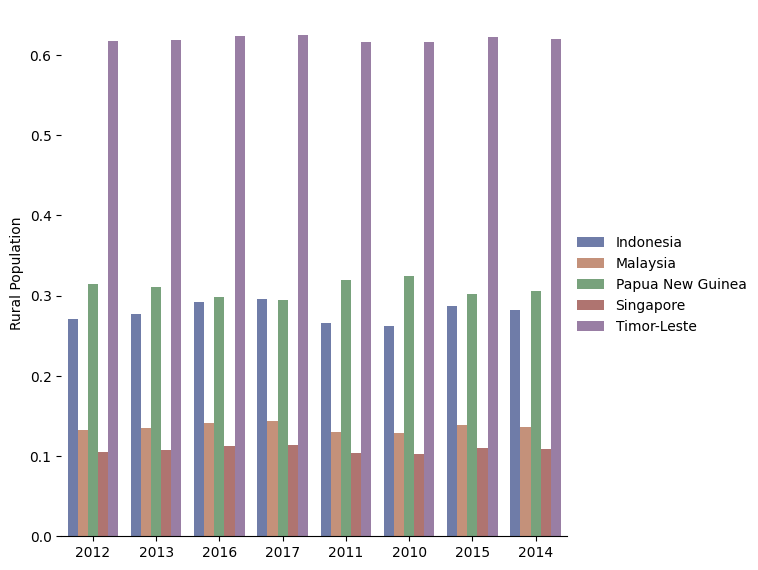

In [67]:
neighborhood = ['Indonesia', 'Malaysia', 'Papua New Guinea', 'Timor-Leste', 'Singapore']
year = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
filtered_df4 = scaled_population_data_melted[scaled_population_data_melted['Country Name'].isin(neighborhood)]
filtered_df4 = filtered_df4[filtered_df4['Year'].isin(year)]

g = sns.catplot(
    data=filtered_df4, kind="bar",
    x="Year", y="Value", hue="Country Name",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Rural Population")
g.legend.set_title("")

#### 4.5 Heatmap Korelasi projects_data

<Axes: >

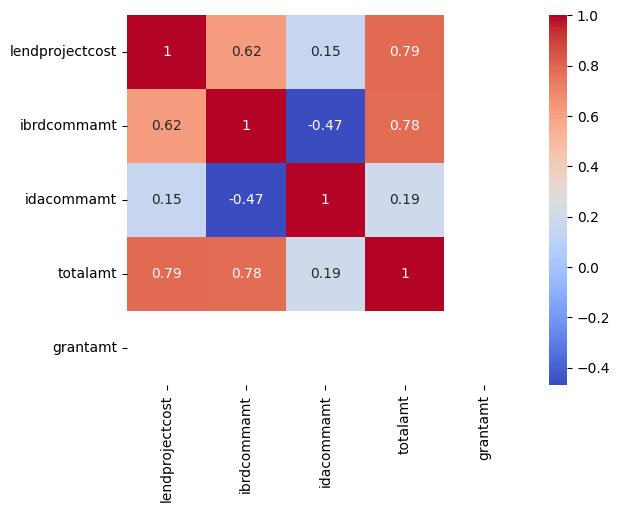

In [68]:
gdppercapita_corr = projects_data.corr(numeric_only=True)
sns.heatmap(gdppercapita_corr, annot=True, cmap="coolwarm")

#### 4.6 Heatmap Korelasi gdppercapita

<Axes: >

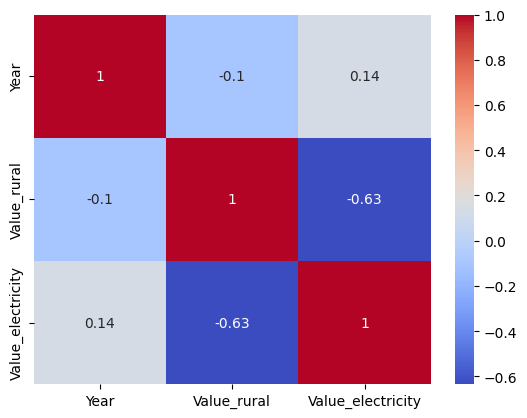

In [69]:
gdppercapita_corr = rural_elec_df.corr(numeric_only=True)
sns.heatmap(gdppercapita_corr, annot=True, cmap="coolwarm")

#### 4.7 Bar plot gdp_data

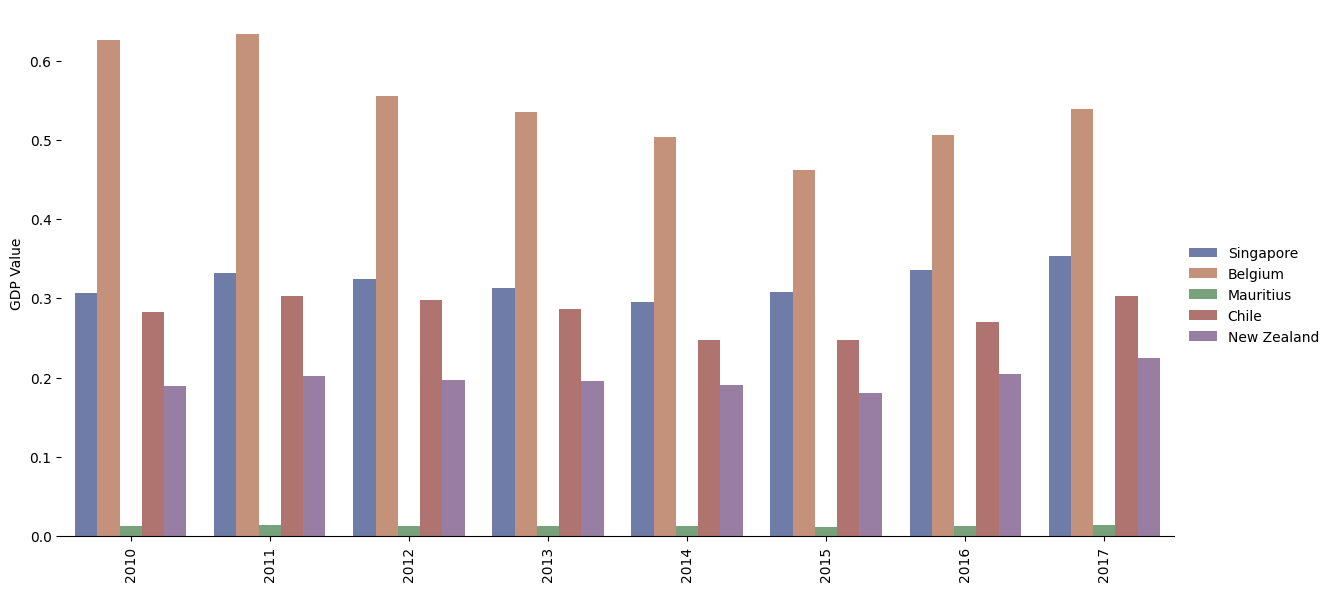

In [70]:
neighborhood = ['"Bahamas, The"', 'Belgium', 'Singapore', 'New Zealand', 'Chile', 'Mauritius']
filtered_df5 = scaled_gdp_data_melted[scaled_gdp_data_melted['Country Name'].isin(neighborhood)]
year = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
filtered_df5 = filtered_df5[filtered_df5['Year'].isin(year)]
filtered_df5 = filtered_df5.sort_values(by='Year')

g = sns.catplot(
    data=filtered_df5, kind="bar",
    x="Year", y="Value", hue="Country Name",
    errorbar="sd", palette="dark", alpha=.6, height=6, aspect=2
)
g.despine(left=True)
g.set_axis_labels("", "GDP Value")
g.legend.set_title("")
plt.xticks(rotation=90)
plt.show()